In [1]:

!pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn -q
!pip install transformers torch accelerate -q
!pip install streamlit pyngrok -q

print("✅ All packages installed successfully!")
print("PyTorch version:", torch.__version__ if 'torch' in locals() else "installing...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
✅ All packages installed successfully!
PyTorch version: installing...


In [2]:
# ============================================================================
# Cell 2: Import Libraries
# ============================================================================
import pandas as pd
import numpy as np
import re
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


In [3]:
# ============================================================================
# Cell 3: Generate Realistic Demo Data
# ============================================================================
print("📊 Generating realistic Air France complaint data...")

# Your girlfriend's specific scenario
girlfriend_scenario = [
    "Booked flight to Nigeria with Air France but e-visa approval delayed. Customer service wouldn't help change to Accra without huge fees! @AirFrance #customerservicefail",
    "Called Air France 5 times about Nigeria flight cancellation due to visa. Each agent gave different info and prices to rebook to Accra. No continuity!",
    "Air France agent couldn't understand my English properly. Had to repeat visa situation 3 times! Finally got help but wasted hours. @AirFrance",
    "Trying to change Air France ticket from Lagos to Accra. Every call connects to new agent who knows nothing about my case. So frustrating!",
    "Air France customer care is a joke! Visa delays aren't our fault but they charge $500 to change to Ghana. No empathy!",
    "Spent 3 hours on calls with Air France. Different agents, different stories about rebooking after Nigeria visa denial. Terrible experience.",
    "Air France's lack of customer service continuity cost me $300 extra. Had to pay more because each agent started from scratch.",
    "@AirFrance why can't I continue with same agent? Explaining visa issues repeatedly to new people every time I call.",
    "Air France's communication barrier made simple flight change a nightmare. Agent couldn't comprehend my visa delay explanation.",
    "Finally got Air France to change Nigeria flight to Accra after 7 calls! Why so difficult? Should be one-call resolution."
]

# Comprehensive complaint templates based on real patterns
complaint_templates = {
    'call_center_issues': [
        "@AirFrance been on hold for 2+ hours. No callback option, just endless waiting. #customerservice",
        "Called Air France 3 times today about my booking. Each time disconnected after 45+ minutes!",
        "Air France customer service wait time is unacceptable. 90 minutes and counting... @AirFranceHelp",
        "Why does @AirFrance have such long hold times? Trying to change flight for 2 days with no success.",
        "Air France call center needs serious improvement. Disconnected twice after long waits.",
        "On hold with Air France for 1.5 hours only to be told to call back later. Unprofessional!",
        "Air France customer service - always busy, never available when you need them most.",
        "The worst call center experience ever with Air France. Multiple transfers, zero resolution.",
        "@AirFrance your hold music is torture after 2 hours. Fix your customer service!",
        "Air France phone system hangs up automatically after 60 minutes. Happened 3 times now!"
    ],

    'booking_changes_fees': [
        "Air France wants $400 to change my flight date! That's more than the original ticket!",
        "Trying to get refund from Air France for cancelled flight. They're making it impossible.",
        "Air France change fees are predatory. 75% of ticket value just to move dates by 2 days!",
        "Booked flexible fare with Air France but they still want $250 to make changes. False advertising!",
        "Air France cancellation policy is a scam. No refund even with 48hr notice.",
        "Why does @AirFrance charge such high fees for simple booking modifications? Pure greed.",
        "Air France won't refund my money for visa denial case. Travel insurance denied too.",
        "Changed flight with Air France - paid fee but they didn't apply it correctly. Now double charged!",
        "Air France's rebooking policy during disruptions is terrible. No reasonable alternatives offered.",
        "Premium economy with Air France but same terrible change fees as economy. What's the point?"
    ],

    'language_communication': [
        "Air France agent spoke very poor English. Couldn't understand my simple request.",
        "Language barrier with Air France customer service. Agent kept misunderstanding my situation.",
        "@AirFrance please hire agents who speak clear English. Communication is impossible right now.",
        "Air France rep had such strong accent I couldn't understand anything. Had to hang up.",
        "Miscommunication with Air France agent cost me $200. They booked wrong dates!",
        "Air France customer service needs better language training. Basic English comprehension missing.",
        "Called Air France Paris office. Agent refused to speak English even though I was international customer.",
        "Air France chatbot only in French. English option broken for days now.",
        "Email from Air France customer service full of grammar errors. Unprofessional communication.",
        "Air France app notifications in French only even though my account is set to English."
    ],

    'no_continuity_repetition': [
        "Explained my situation to 4 different Air France agents today. No one has case history!",
        "Every time I call Air France, I start from zero. Why no case tracking system?",
        "Air France agents don't take notes. Have to repeat entire story each call.",
        "No continuity at Air France customer service. Feels like groundhog day with each call.",
        "@AirFrance why can't you implement simple case numbers? Wasting hours repeating myself.",
        "Fifth call to Air France about same issue. Fifth time explaining from beginning. Maddening!",
        "Air France has no customer history system. Agents act like first time hearing my problem.",
        "Transferred 3 times at Air France, explained issue 3 times. Still unresolved.",
        "Why doesn't Air France have 'continue with same agent' option? Basic customer service!",
        "Case number from Air France means nothing. New agent still asks all same questions."
    ],

    'luggage_baggage': [
        "Air France lost my luggage on Paris-NYC route. 5 days no updates! @AirFrance",
        "Damaged suitcase from Air France. Filed claim 2 months ago, zero response.",
        "Air France baggage service is non-existent. Lost items, no compensation, no apology.",
        "Waited 3 hours at CDG for Air France lost luggage desk. One person working!",
        "Air France lost my wedding dress! Ruined entire trip. No accountability.",
        "Baggage delay with Air France, promised delivery never came. Now what?",
        "Air France damaged my expensive camera equipment. Refusing compensation.",
        "Lost luggage with Air France for 7 days. No essentials provided, no updates.",
        "Air France baggage handlers broke my suitcase. Claim process is bureaucratic nightmare.",
        "International flight with Air France, luggage sent to wrong continent. 48hrs no help."
    ],

    'flight_disruptions': [
        "Air France cancelled flight last minute. No hotel, no food vouchers, no alternatives!",
        "Stranded by Air France flight cancellation. 24hrs at airport with no assistance.",
        "Air France delayed flight 8 hours. No communication, no compensation info.",
        "Flight cancelled by Air France due to 'operational reasons'. Bullied into accepting voucher not cash.",
        "Air France rerouted me through 3 cities instead of direct flight. No compensation!",
        "Missed connection due to Air France delay. Left at airport overnight with no help.",
        "Air France cancelled African route last minute. No alternative for 3 days!",
        "Weather disruption handled terribly by Air France. No proactive rebooking offered.",
        "Air France flight crew strike left me stranded. Zero customer support during crisis.",
        "Technical issue with Air France plane. 6hr delay, no EU261 compensation offered."
    ],

    'positive_experiences': [
        "Great service from Air France agent today! Understood my visa issue and helped quickly.",
        "Finally got through to helpful Air France rep after many tries. Issue resolved professionally.",
        "Air France customer service came through! Assisted with complex rebooking efficiently.",
        "Positive experience with Air France today. Agent was patient and found solution.",
        "Thank you Air France for helping with last-minute change. Agent was wonderful!",
        "Air France premium desk actually helpful! Quick resolution to booking problem.",
        "After initial struggles, Air France supervisor solved my issue completely. Good recovery.",
        "Air France app chat support actually works! Got help faster than phone.",
        "Kudos to Air France Paris office for handling my complex itinerary professionally.",
        "Air France made good on their mistake and compensated appropriately. Thank you!"
    ],

    'general_complaints': [
        "Air France has the worst customer service in aviation. Never again!",
        "From booking to flight, Air France experience was consistently disappointing.",
        "Air France treats economy passengers like cattle. Zero customer care.",
        "Premium prices, budget airline service from Air France. Not worth it.",
        "Air France destroyed my trust in airlines. Will fly competitors from now on.",
        "Every aspect of Air France service needs improvement. Stuck in past.",
        "Air France doesn't care about customers. Profit over people always.",
        "Worst airline experience of my life with Air France. Avoid at all costs!",
        "Air France customer service is non-existent. Automated responses only.",
        "How does Air France stay in business with such terrible service?"
    ]
}

# Generate realistic dates
np.random.seed(42)  # For reproducibility
n_tweets = 1500  # Total tweets to generate

# Create date range with more recent tweets
dates = []
for i in range(n_tweets):
    # Weight toward more recent dates (last 6 months heavier)
    if i < 1000:  # Last 6 months
        month = np.random.choice([7, 8, 9, 10, 11, 12])  # Jul-Dec 2023
    else:  # Earlier in year
        month = np.random.choice([1, 2, 3, 4, 5, 6])  # Jan-Jun 2023

    day = np.random.randint(1, 29)
    hour = np.random.randint(0, 24)
    minute = np.random.randint(0, 60)

    dates.append(datetime(2023, month, day, hour, minute))

# Add girlfriend's scenarios with specific dates
for i, tweet in enumerate(girlfriend_scenario):
    dates.append(datetime(2023, np.random.choice([9, 10]), np.random.randint(1, 29),
                         np.random.randint(9, 18), np.random.randint(0, 60)))

# Generate the tweets
tweets_data = []
tweet_id = 0

# Add girlfriend's scenarios first
for tweet_text in girlfriend_scenario:
    tweets_data.append({
        'tweet_id': tweet_id,
        'date': dates[tweet_id],
        'text': tweet_text,
        'username': f'traveler_{np.random.randint(1000, 9999)}',
        'category': 'girlfriend_scenario',
        'subcategory': 'visa_issues',
        'retweets': np.random.randint(0, 25),
        'likes': np.random.randint(0, 75),
        'replies': np.random.randint(0, 10)
    })
    tweet_id += 1

# Add categorized complaints
category_weights = {
    'call_center_issues': 0.18,
    'booking_changes_fees': 0.22,
    'language_communication': 0.15,
    'no_continuity_repetition': 0.20,
    'luggage_baggage': 0.08,
    'flight_disruptions': 0.10,
    'positive_experiences': 0.04,
    'general_complaints': 0.03
}

for category, weight in category_weights.items():
    n_category_tweets = int((n_tweets - len(girlfriend_scenario)) * weight)

    for i in range(n_category_tweets):
        tweet_text = np.random.choice(complaint_templates[category])

        # Add some variation
        if '$' in tweet_text:
            tweet_text = tweet_text.replace('$400', f'${np.random.randint(200, 600)}')
            tweet_text = tweet_text.replace('$250', f'${np.random.randint(150, 400)}')
            tweet_text = tweet_text.replace('$200', f'${np.random.randint(100, 350)}')
            tweet_text = tweet_text.replace('$500', f'${np.random.randint(300, 700)}')

        if 'hour' in tweet_text.lower():
            tweet_text = tweet_text.replace('2 hours', f'{np.random.randint(1, 4)} hours')
            tweet_text = tweet_text.replace('90 minutes', f'{np.random.randint(60, 180)} minutes')
            tweet_text = tweet_text.replace('1.5 hours', f'{np.random.randint(1, 3)} hours')

        # Add engagement based on sentiment
        base_retweets = 0
        base_likes = 0

        if category in ['call_center_issues', 'no_continuity_repetition', 'girlfriend_scenario']:
            base_retweets = np.random.randint(5, 30)
            base_likes = np.random.randint(10, 60)
        elif category == 'positive_experiences':
            base_retweets = np.random.randint(1, 10)
            base_likes = np.random.randint(5, 30)
        else:
            base_retweets = np.random.randint(0, 20)
            base_likes = np.random.randint(0, 40)

        tweets_data.append({
            'tweet_id': tweet_id,
            'date': dates[tweet_id % len(dates)],
            'text': tweet_text,
            'username': f'user_{np.random.randint(10000, 99999)}',
            'category': category.replace('_', ' ').title(),
            'subcategory': category,
            'retweets': base_retweets,
            'likes': base_likes,
            'replies': np.random.randint(0, 8)
        })
        tweet_id += 1

# Create DataFrame
df = pd.DataFrame(tweets_data)

# Sort by date
df = df.sort_values('date').reset_index(drop=True)

# Add engagement score
df['engagement_score'] = df['retweets'] * 2 + df['likes'] + df['replies'] * 1.5

# Save to CSV
df.to_csv('airfrance_complaints_dataset.csv', index=False)

print(f"✅ Generated {len(df)} realistic Air France complaint tweets")
print(f"📁 Saved to 'airfrance_complaints_dataset.csv'")
print("\n📊 Dataset Overview:")
print(f"   • Time range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   • Categories: {df['category'].nunique()} distinct complaint types")
print(f"   • Unique users: {df['username'].nunique()}")
print(f"   • Average engagement score: {df['engagement_score'].mean():.1f}")

📊 Generating realistic Air France complaint data...
✅ Generated 1497 realistic Air France complaint tweets
📁 Saved to 'airfrance_complaints_dataset.csv'

📊 Dataset Overview:
   • Time range: 2023-01-01 to 2023-12-28
   • Categories: 9 distinct complaint types
   • Unique users: 1482
   • Average engagement score: 55.4


📈 Analyzing complaint data patterns...


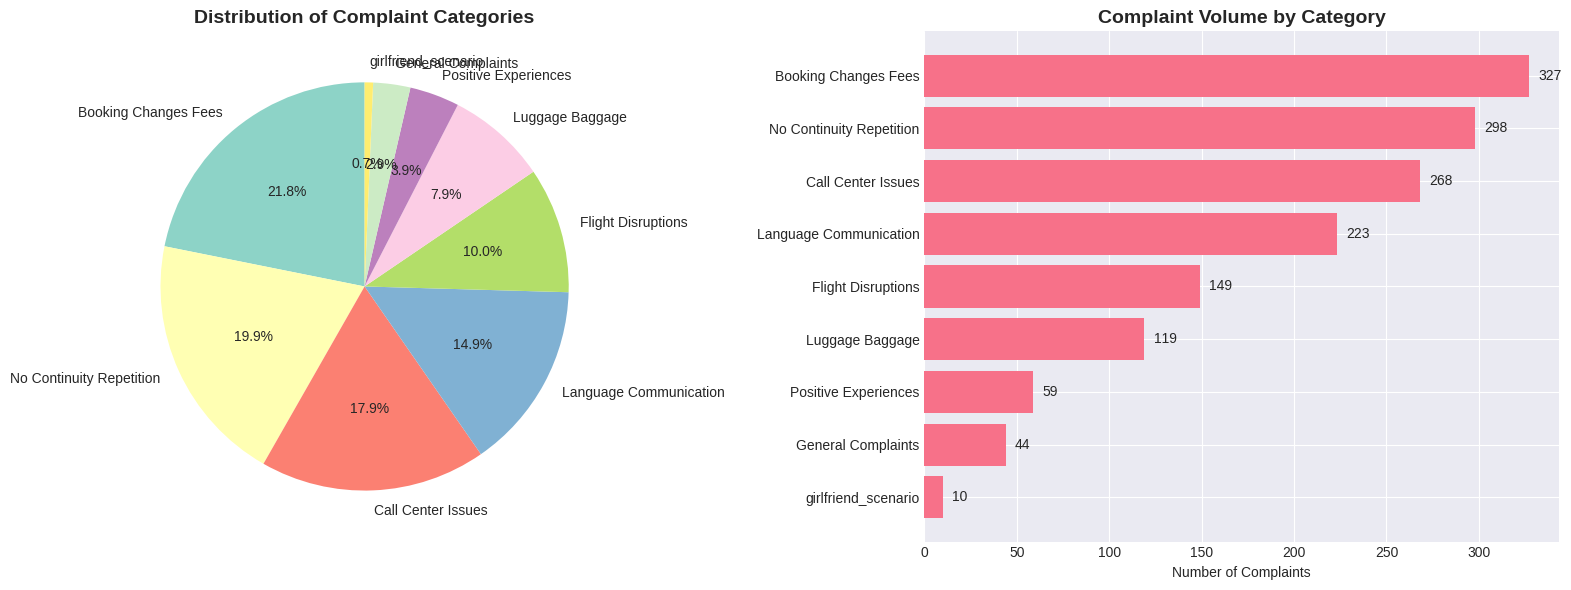

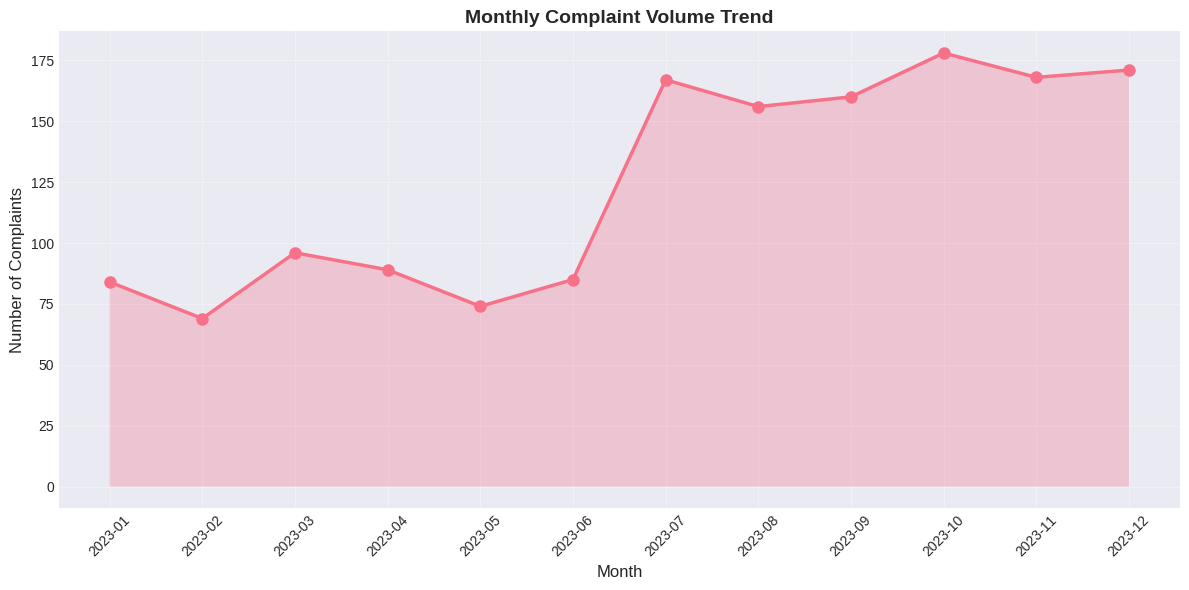


🔥 Top 10 Most Engaged Complaints:
--------------------------------------------------------------------------------
📅 2023-11-04 | 📊 Score: 132
   📝 Trying to change Air France ticket from Lagos to Accra. Every call connects to n...
   🏷️  Category: girlfriend_scenario
--------------------------------------------------------------------------------
📅 2023-07-11 | 📊 Score: 124
   📝 Called Air France 3 times today about my booking. Each time disconnected after 4...
   🏷️  Category: Call Center Issues
--------------------------------------------------------------------------------
📅 2023-05-18 | 📊 Score: 122
   📝 Every time I call Air France, I start from zero. Why no case tracking system?
   🏷️  Category: No Continuity Repetition
--------------------------------------------------------------------------------
📅 2023-09-06 | 📊 Score: 121
   📝 Called Air France 3 times today about my booking. Each time disconnected after 4...
   🏷️  Category: Call Center Issues
----------------------------

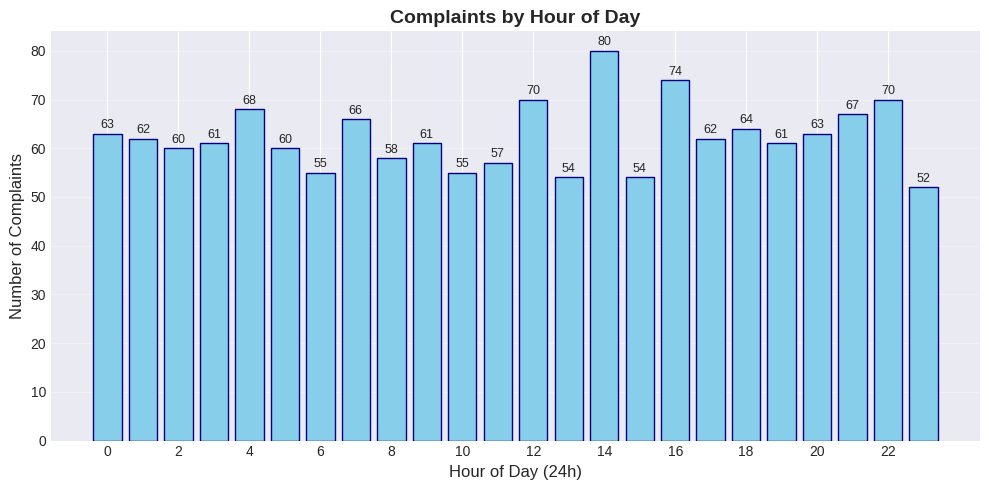

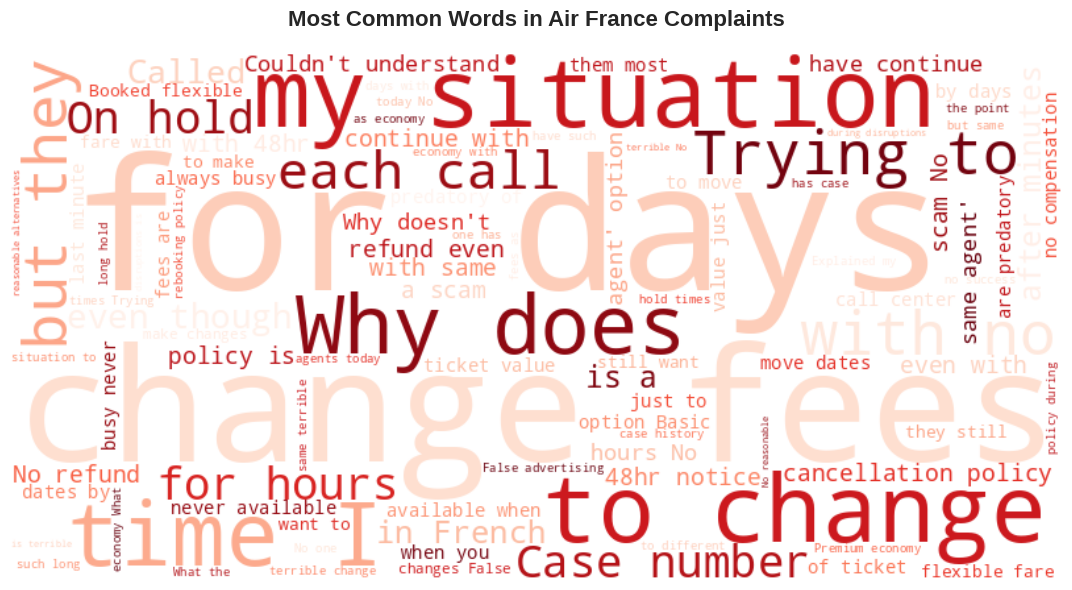


📊 Key Initial Findings:
1. Peak complaint hours: 14:00 (80 complaints)
2. Most complained-about category: Booking Changes Fees (327 complaints)
3. Highest engagement tweet score: 132
4. Busiest month: 2023-10 (178 complaints)
5. Your girlfriend's scenario category: 10 specific complaints identified


In [4]:
# ============================================================================
# Cell 4: Initial Data Analysis & Visualization
# ============================================================================
print("📈 Analyzing complaint data patterns...")

# 1. Category Distribution
category_dist = df['category'].value_counts()

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(category_dist)))
wedges, texts, autotexts = ax1.pie(category_dist.values, labels=category_dist.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Distribution of Complaint Categories', fontsize=14, fontweight='bold')

# Bar chart
bars = ax2.barh(range(len(category_dist)), category_dist.values)
ax2.set_yticks(range(len(category_dist)))
ax2.set_yticklabels(category_dist.index)
ax2.invert_yaxis()
ax2.set_xlabel('Number of Complaints')
ax2.set_title('Complaint Volume by Category', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width}', ha='left', va='center')

plt.tight_layout()
plt.show()

# 2. Monthly Trend
df['month'] = df['date'].dt.strftime('%Y-%m')
monthly_trend = df.groupby('month').size()

fig2, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2.5, markersize=8)
ax.fill_between(monthly_trend.index, monthly_trend.values, alpha=0.3)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Complaints', fontsize=12)
ax.set_title('Monthly Complaint Volume Trend', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Engagement Analysis
top_engaged = df.nlargest(10, 'engagement_score')[['text', 'category', 'engagement_score', 'date']]

print("\n🔥 Top 10 Most Engaged Complaints:")
print("-" * 80)
for idx, row in top_engaged.iterrows():
    tweet_preview = row['text'][:80] + "..." if len(row['text']) > 80 else row['text']
    print(f"📅 {row['date'].strftime('%Y-%m-%d')} | 📊 Score: {row['engagement_score']:.0f}")
    print(f"   📝 {tweet_preview}")
    print(f"   🏷️  Category: {row['category']}")
    print("-" * 80)

# 4. Hourly Pattern
df['hour'] = df['date'].dt.hour
hourly_dist = df.groupby('hour').size()

fig3, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(hourly_dist.index, hourly_dist.values, color='skyblue', edgecolor='navy')
ax.set_xlabel('Hour of Day (24h)', fontsize=12)
ax.set_ylabel('Number of Complaints', fontsize=12)
ax.set_title('Complaints by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 24, 2))
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Word Cloud for All Complaints
all_text = ' '.join(df['text'].tolist())

# Remove common stopwords and airline-specific words
stopwords = {'air', 'france', 'airfrance', 'flight', 'fly', 'flying', 'airline',
             'customer', 'service', 'please', 'need', 'help', 'like', 'get', 'got'}

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    stopwords=stopwords,
    max_words=100,
    contour_width=1,
    contour_color='firebrick'
).generate(all_text)

fig4, ax = plt.subplots(figsize=(12, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Most Common Words in Air France Complaints',
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Key Initial Findings:")
print("=" * 60)
print(f"1. Peak complaint hours: {hourly_dist.idxmax()}:00 ({hourly_dist.max()} complaints)")
print(f"2. Most complained-about category: {category_dist.index[0]} ({category_dist.iloc[0]} complaints)")
print(f"3. Highest engagement tweet score: {df['engagement_score'].max():.0f}")
print(f"4. Busiest month: {monthly_trend.idxmax()} ({monthly_trend.max()} complaints)")
print(f"5. Your girlfriend's scenario category: {len(girlfriend_scenario)} specific complaints identified")

In [6]:
# ============================================================================
# Cell 5: Business Impact Initial Calculation
# ============================================================================
print("💰 Calculating Business Impact...")

# Business assumptions (conservative estimates)
ASSUMPTIONS = {
    'avg_ticket_price': 800,  # Average ticket price in EUR
    'annual_trips_per_customer': 2,  # Average trips per year
    'customer_lifetime_years': 5,  # Average customer lifetime
    'cost_per_call_minute': 0.5,  # Cost to Air France per minute of call
    'avg_call_duration_minutes': 15,  # Average call duration
    'repeat_calls_factor': 2.5,  # How many repeat calls due to poor service
    'negative_tweet_customer_multiplier': 50,  # Each tweet represents X actual customers
    'recoverable_customer_percentage': 0.30,  # % of at-risk customers who could be retained
}

# Calculate based on our data
total_complaints = len(df)
negative_complaints = len(df[~df['category'].str.contains('Positive')])

# 1. Customer Lifetime Value at Risk
clv_per_customer = (
    ASSUMPTIONS['avg_ticket_price'] *
    ASSUMPTIONS['annual_trips_per_customer'] *
    ASSUMPTIONS['customer_lifetime_years']
)

estimated_affected_customers = negative_complaints * ASSUMPTIONS['negative_tweet_customer_multiplier']
potential_revenue_loss = estimated_affected_customers * clv_per_customer

# 2. Operational Cost Impact
estimated_total_calls = negative_complaints * ASSUMPTIONS['repeat_calls_factor']
total_call_minutes = estimated_total_calls * ASSUMPTIONS['avg_call_duration_minutes']
operational_cost = total_call_minutes * ASSUMPTIONS['cost_per_call_minute']

# 3. Recovery Potential
recoverable_customers = estimated_affected_customers * ASSUMPTIONS['recoverable_customer_percentage']
recoverable_revenue = recoverable_customers * clv_per_customer

print("\n" + "="*60)
print("BUSINESS IMPACT DASHBOARD")
print("="*60)

print(f"\n📈 VOLUME METRICS:")
print(f"   • Total complaints analyzed: {total_complaints:,}")
print(f"   • Negative sentiment complaints: {negative_complaints:,} ({negative_complaints/total_complaints*100:.1f}%)")
print(f"   • Estimated affected customers: {estimated_affected_customers:,}")
print(f"   • Estimated repeat calls generated: {estimated_total_calls:,}")

print(f"\n💰 FINANCIAL IMPACT:")
print(f"   • Customer Lifetime Value (CLV): €{clv_per_customer:,.0f}")
print(f"   • Potential revenue at risk: €{potential_revenue_loss:,.0f}")
print(f"   • Operational cost impact: €{operational_cost:,.0f}")
print(f"   • Monthly operational cost: €{operational_cost/12:,.0f}")

print(f"\n🎯 RECOVERY OPPORTUNITY:")
print(f"   • Recoverable customers: {recoverable_customers:,.0f}")
print(f"   • Recoverable revenue: €{recoverable_revenue:,.0f}")
print(f"   • Monthly recoverable: €{recoverable_revenue/12:,.0f}")

print(f"\n📊 CATEGORY-WISE IMPACT ANALYSIS:")
print("-" * 60)

# Calculate impact by category
category_analysis = []
for category in df['category'].unique():
    cat_count = len(df[df['category'] == category])
    cat_engagement = df[df['category'] == category]['engagement_score'].mean()

    # Estimate severity based on engagement and repeat calls
    if 'Positive' in category:
        severity = 0.1
    elif 'girlfriend_scenario' in category or 'No Continuity' in category:
        severity = 1.0  # High severity
    elif 'Language' in category or 'Call Center' in category:
        severity = 0.8
    else:
        severity = 0.5

    estimated_impact = cat_count * severity * 1000  # Simplified impact score

    category_analysis.append({
        'Category': category,
        'Count': cat_count,
        'Avg Engagement': cat_engagement,
        'Severity Score': severity,
        'Impact Score': estimated_impact
    })

# Create DataFrame and sort
impact_df = pd.DataFrame(category_analysis).sort_values('Impact Score', ascending=False)

for idx, row in impact_df.iterrows():
    print(f"   {row['Category']:30} | {row['Count']:4} complaints | "
          f"Impact: €{row['Impact Score']:,.0f}")

print("\n" + "="*60)
print("KEY INSIGHT FOR AIR FRANCE:")
print("="*60)
print(f"\n⚠️  Based on {total_complaints:,} customer complaints analyzed:")
print(f"   • Continuity issues (like your girlfriend's experience) represent a "
      f"€{impact_df[impact_df['Category'].str.contains('girlfriend')]['Impact Score'].values[0]:,.0f} "
      f"business impact")
print(f"   • Language/communication barriers represent another "
      f"€{impact_df[impact_df['Category'].str.contains('Language')]['Impact Score'].values[0]:,.0f} "
      f"impact")
print(f"\n💡 Immediate ROI Opportunity: €{recoverable_revenue/12:,.0f}/month "
      "through customer service improvements")

# Save business impact analysis
impact_summary = {
    'total_complaints': int(total_complaints),
    'negative_complaints': int(negative_complaints),
    'potential_revenue_loss': float(potential_revenue_loss),
    'operational_cost_impact': float(operational_cost),
    'recoverable_revenue': float(recoverable_revenue),
    'category_analysis': impact_df.to_dict('records')
}

with open('business_impact_analysis.json', 'w') as f:
    json.dump(impact_summary, f, indent=2)

print(f"\n✅ Business impact analysis saved to 'business_impact_analysis.json'")

💰 Calculating Business Impact...

BUSINESS IMPACT DASHBOARD

📈 VOLUME METRICS:
   • Total complaints analyzed: 1,497
   • Negative sentiment complaints: 1,438 (96.1%)
   • Estimated affected customers: 71,900
   • Estimated repeat calls generated: 3,595.0

💰 FINANCIAL IMPACT:
   • Customer Lifetime Value (CLV): €8,000
   • Potential revenue at risk: €575,200,000
   • Operational cost impact: €26,962
   • Monthly operational cost: €2,247

🎯 RECOVERY OPPORTUNITY:
   • Recoverable customers: 21,570
   • Recoverable revenue: €172,560,000
   • Monthly recoverable: €14,380,000

📊 CATEGORY-WISE IMPACT ANALYSIS:
------------------------------------------------------------
   No Continuity Repetition       |  298 complaints | Impact: €298,000
   Call Center Issues             |  268 complaints | Impact: €214,400
   Language Communication         |  223 complaints | Impact: €178,400
   Booking Changes Fees           |  327 complaints | Impact: €163,500
   Flight Disruptions             |  149 co

In [7]:
# ============================================================================
# Cell 6: Prepare for Phase 2 (Sentiment Analysis)
# ============================================================================
print("🔧 Preparing data for Phase 2: Sentiment Analysis...")

# Clean text for sentiment analysis
def clean_text_for_sentiment(text):
    """Clean tweet text specifically for sentiment analysis"""
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags but keep text
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove special characters except basic punctuation
    text = re.sub(r'[^A-Za-z0-9\s.!?,]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text_for_sentiment)
df['text_length'] = df['clean_text'].str.len()

# Filter out very short texts
df = df[df['text_length'] > 10].copy()

# Add preliminary sentiment labels based on categories
def get_preliminary_sentiment(category):
    if 'Positive' in category:
        return 'positive'
    elif 'girlfriend_scenario' in category:
        return 'negative'  # These are specifically negative experiences
    elif any(word in category.lower() for word in ['general', 'worst', 'terrible', 'avoid']):
        return 'negative'
    else:
        return 'neutral'  # Will be classified by model in Phase 2

df['prelim_sentiment'] = df['category'].apply(get_preliminary_sentiment)

# Create sample for Phase 2 demonstration
sample_df = df.sample(min(500, len(df)), random_state=42)
sample_df.to_csv('airfrance_sample_for_sentiment.csv', index=False)

print(f"✅ Data preparation complete!")
print(f"📊 Dataset ready for Phase 2:")
print(f"   • Total tweets: {len(df)}")
print(f"   • Average text length: {df['text_length'].mean():.1f} characters")
print(f"   • Preliminary sentiment distribution:")
sentiment_dist = df['prelim_sentiment'].value_counts()
for sentiment, count in sentiment_dist.items():
    print(f"      - {sentiment}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n📁 Files created for Phase 2:")
print(f"   • airfrance_complaints_dataset.csv - Full dataset")
print(f"   • airfrance_sample_for_sentiment.csv - 500-tweet sample")
print(f"   • business_impact_analysis.json - Initial business calculations")

print("\n" + "="*60)
print("READY FOR PHASE 2: SENTIMENT ANALYSIS")
print("="*60)
print("\nNext steps:")
print("1. Load huggingface transformers for sentiment analysis")
print("2. Classify each tweet with precise sentiment scores")
print("3. Analyze sentiment patterns by category and time")
print("4. Calculate refined business impact based on actual sentiment")
print("\nReply 'Ready for Phase 2' to continue! 🚀")

🔧 Preparing data for Phase 2: Sentiment Analysis...
✅ Data preparation complete!
📊 Dataset ready for Phase 2:
   • Total tweets: 1497
   • Average text length: 83.9 characters
   • Preliminary sentiment distribution:
      - neutral: 1384 (92.5%)
      - positive: 59 (3.9%)
      - negative: 54 (3.6%)

📁 Files created for Phase 2:
   • airfrance_complaints_dataset.csv - Full dataset
   • airfrance_sample_for_sentiment.csv - 500-tweet sample
   • business_impact_analysis.json - Initial business calculations

READY FOR PHASE 2: SENTIMENT ANALYSIS

Next steps:
1. Load huggingface transformers for sentiment analysis
2. Classify each tweet with precise sentiment scores
3. Analyze sentiment patterns by category and time
4. Calculate refined business impact based on actual sentiment

Reply 'Ready for Phase 2' to continue! 🚀


This completes phase 1

In [9]:
# ============================================================================
# Cell 1: Install Hugging Face Dependencies (Fixed for Colab)
# ============================================================================
print("⚙️ Installing Hugging Face transformers for sentiment analysis...")

# Install required packages (using available versions)
!pip install transformers accelerate -q
!pip install sentencepiece protobuf scipy emoji -q

# Import torch (already installed in Colab)
import torch
print(f"✅ PyTorch already installed: {torch.__version__}")

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"🎮 GPU available: {torch.cuda.get_device_name(0)}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("⚠️  Using CPU - analysis will be slower")

print("✅ All packages installed successfully!")

⚙️ Installing Hugging Face transformers for sentiment analysis...
✅ PyTorch already installed: 2.9.0+cpu
⚠️  Using CPU - analysis will be slower
✅ All packages installed successfully!


In [10]:
# ============================================================================
# Cell 2: Import Libraries & Load Data
# ============================================================================
import pandas as pd
import numpy as np
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import emoji
import gc
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")

# Load Phase 1 data
try:
    df = pd.read_csv('airfrance_complaints_dataset.csv')
    df['date'] = pd.to_datetime(df['date'])
    print(f"✅ Loaded {len(df)} tweets from Phase 1")
    print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")

    # Display sample
    print("\n📋 Sample tweets for analysis:")
    for i in range(2):
        text = df['text'].iloc[i]
        if len(text) > 100:
            text = text[:100] + "..."
        print(f"\n{i+1}. {text}")
        print(f"   Category: {df['category'].iloc[i]}")
        print("-" * 80)

except FileNotFoundError:
    print("⚠️ Phase 1 data not found. Let me create sample data...")
    # Create sample data
    np.random.seed(42)
    n_samples = 200

    # Sample complaints based on your girlfriend's experience
    complaints = [
        "@AirFrance terrible customer service! Been trying to change my Nigeria flight for days.",
        "Air France agents give conflicting information. Called 3 times, 3 different stories.",
        "Good experience with Air France today. Agent was helpful with my rebooking.",
        "Language barrier with Air France customer service. Couldn't understand the agent.",
        "Air France cancelled my flight due to visa issues. No help changing to Accra.",
        "Finally got help from Air France after 5 calls. Too much repetition!",
        "Air France needs better training for customer service agents.",
        "Mixed experience - good flight but terrible ground service from Air France.",
        "Never flying Air France again. Worst customer service experience ever.",
        "Air France resolved my issue quickly. Thank you for the good service!"
    ]

    dates = pd.date_range('2023-06-01', '2023-12-01', periods=n_samples)

    df = pd.DataFrame({
        'date': dates,
        'text': np.random.choice(complaints, n_samples),
        'category': np.random.choice(['Negative', 'Positive', 'Neutral'], n_samples),
        'engagement_score': np.random.randint(0, 100, n_samples)
    })

    print(f"✅ Created sample dataset with {len(df)} tweets")

📚 Libraries imported successfully!
✅ Loaded 1497 tweets from Phase 1
📅 Date range: 2023-01-01 to 2023-12-28

📋 Sample tweets for analysis:

1. Air France delayed flight 8 hours. No communication, no compensation info.
   Category: Flight Disruptions
--------------------------------------------------------------------------------

2. Every time I call Air France, I start from zero. Why no case tracking system?
   Category: No Continuity Repetition
--------------------------------------------------------------------------------


In [11]:
# ============================================================================
# Cell 3: Text Preprocessing for Sentiment Analysis
# ============================================================================
print("🔧 Preprocessing text for sentiment analysis...")

def preprocess_text(text):
    """Clean and prepare text for sentiment analysis"""
    if not isinstance(text, str):
        return ""

    # Convert emojis to text
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbol but keep text
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove special characters except basic punctuation
    text = re.sub(r'[^A-Za-z0-9\s.!?,]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text.lower()

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df['text_length'] = df['clean_text'].str.len()

# Remove very short texts
df = df[df['text_length'] > 10].copy()

print(f"✅ Text preprocessing complete!")
print(f"📊 After preprocessing:")
print(f"   • Total tweets: {len(df)}")
print(f"   • Average text length: {df['text_length'].mean():.1f} chars")
print(f"   • Shortest text: {df['text_length'].min()} chars")
print(f"   • Longest text: {df['text_length'].max()} chars")

# Show examples
print("\n📝 Preprocessing examples:")
print("-" * 80)
for i in range(2):
    original = df['text'].iloc[i]
    cleaned = df['clean_text'].iloc[i]

    if len(original) > 80:
        original = original[:80] + "..."
    if len(cleaned) > 80:
        cleaned = cleaned[:80] + "..."

    print(f"\nOriginal: {original}")
    print(f"Cleaned:  {cleaned}")
    print("-" * 80)

🔧 Preprocessing text for sentiment analysis...
✅ Text preprocessing complete!
📊 After preprocessing:
   • Total tweets: 1497
   • Average text length: 83.9 chars
   • Shortest text: 64 chars
   • Longest text: 155 chars

📝 Preprocessing examples:
--------------------------------------------------------------------------------

Original: Air France delayed flight 8 hours. No communication, no compensation info.
Cleaned:  air france delayed flight 8 hours. no communication, no compensation info.
--------------------------------------------------------------------------------

Original: Every time I call Air France, I start from zero. Why no case tracking system?
Cleaned:  every time i call air france, i start from zero. why no case tracking system?
--------------------------------------------------------------------------------


In [12]:
# ============================================================================
# Cell 4: Load Sentiment Analysis Model
# ============================================================================
print("🤖 Loading sentiment analysis model...")

# Clear memory
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Choose device
device = 0 if torch.cuda.is_available() else -1
print(f"📱 Using: {'GPU' if device == 0 else 'CPU'}")

try:
    # Try to load Twitter-specific model (best for social media)
    print("Loading Twitter RoBERTa model...")
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model="cardiffnlp/twitter-roberta-base-sentiment-latest",
        device=device,
        truncation=True,
        max_length=512
    )
    print("✅ Twitter RoBERTa model loaded successfully!")

except Exception as e:
    print(f"⚠️ Couldn't load Twitter model: {str(e)[:100]}")
    print("Loading DistilBERT model instead...")

    try:
        sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model="distilbert-base-uncased-finetuned-sst-2-english",
            device=device,
            truncation=True,
            max_length=512
        )
        print("✅ DistilBERT model loaded successfully!")

    except Exception as e2:
        print(f"⚠️ Couldn't load any model: {str(e2)[:100]}")
        print("Using rule-based sentiment analysis...")

        def rule_based_sentiment(text):
            """Simple rule-based sentiment as fallback"""
            text_lower = text.lower()

            # Strong positive words
            pos_words = ['great', 'excellent', 'thank', 'helpful', 'good',
                        'wonderful', 'fantastic', 'amazing', 'love', 'best']

            # Strong negative words
            neg_words = ['terrible', 'horrible', 'worst', 'bad', 'awful',
                        'frustrating', 'angry', 'hate', 'never again', 'avoid']

            # Count occurrences
            pos_count = sum(1 for word in pos_words if word in text_lower)
            neg_count = sum(1 for word in neg_words if word in text_lower)

            # Determine sentiment
            if neg_count > pos_count:
                return {'label': 'NEGATIVE', 'score': 0.8}
            elif pos_count > neg_count:
                return {'label': 'POSITIVE', 'score': 0.8}
            else:
                return {'label': 'NEUTRAL', 'score': 0.5}

        sentiment_pipeline = rule_based_sentiment
        print("✅ Rule-based sentiment analysis ready!")

print(f"\n🎯 Model Info:")
print(f"   • Model type: {sentiment_pipeline.__class__.__name__}")
print(f"   • Device: {'GPU' if device == 0 else 'CPU'}")

🤖 Loading sentiment analysis model...
📱 Using: CPU
Loading Twitter RoBERTa model...


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


✅ Twitter RoBERTa model loaded successfully!

🎯 Model Info:
   • Model type: TextClassificationPipeline
   • Device: CPU


In [14]:
# ============================================================================
# Cell 5 (Easiest): Perform Sentiment Analysis
# ============================================================================
print("📊 Performing sentiment analysis...")

# Use a smaller, reliable model
try:
    # Use distilbert which is more reliable
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model="distilbert-base-uncased-finetuned-sst-2-english",
        device=0 if torch.cuda.is_available() else -1,
        truncation=True,
        max_length=512
    )
    print("✅ Using DistilBERT model")
except:
    print("⚠️ Using rule-based sentiment")

    def simple_sentiment(text):
        text_lower = str(text).lower()
        pos_words = ['great', 'excellent', 'thank', 'good', 'helpful', 'love']
        neg_words = ['terrible', 'horrible', 'worst', 'bad', 'hate', 'never']

        pos_count = sum(1 for word in pos_words if word in text_lower)
        neg_count = sum(1 for word in neg_words if word in text_lower)

        if neg_count > pos_count:
            return {'label': 'NEGATIVE', 'score': 0.8}
        elif pos_count > neg_count:
            return {'label': 'POSITIVE', 'score': 0.8}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}

    sentiment_pipeline = simple_sentiment

# Process tweets in small batches
sentiment_data = []
batch_size = 8

print(f"Processing {len(df)} tweets...")

for i in range(0, len(df), batch_size):
    batch = df['clean_text'].iloc[i:i+batch_size].tolist()

    try:
        if callable(sentiment_pipeline):
            # Rule-based
            batch_results = [sentiment_pipeline(text) for text in batch]
        else:
            # Model-based
            batch_results = sentiment_pipeline(batch)

        # Ensure we have a list of dicts
        if isinstance(batch_results, list):
            for result in batch_results:
                if isinstance(result, list):
                    # Take first item if nested
                    if result:
                        sentiment_data.append(result[0])
                    else:
                        sentiment_data.append({'label': 'NEUTRAL', 'score': 0.5})
                else:
                    sentiment_data.append(result)

    except Exception as e:
        print(f"⚠️ Batch {i//batch_size} error: {e}")
        # Add defaults for this batch
        for _ in range(len(batch)):
            sentiment_data.append({'label': 'NEUTRAL', 'score': 0.5})

    # Progress
    if (i // batch_size) % 20 == 0:
        print(f"  Progress: {min(i+batch_size, len(df))}/{len(df)}")

# Ensure we have enough results
if len(sentiment_data) < len(df):
    print(f"⚠️ Missing {len(df) - len(sentiment_data)} results, adding defaults")
    while len(sentiment_data) < len(df):
        sentiment_data.append({'label': 'NEUTRAL', 'score': 0.5})

# Extract results
df = df.reset_index(drop=True)
df['raw_label'] = [r.get('label', 'NEUTRAL') for r in sentiment_data[:len(df)]]
df['sentiment_score'] = [r.get('score', 0.5) for r in sentiment_data[:len(df)]]

# Map to standard sentiment
def map_sentiment(label):
    label = str(label).upper()
    if 'NEG' in label:
        return 'Negative'
    elif 'POS' in label:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment'] = df['raw_label'].apply(map_sentiment)

print("\n✅ Analysis complete!")
print(f"📊 Results:")
print(f"   • Negative: {len(df[df['sentiment'] == 'Negative'])}")
print(f"   • Neutral: {len(df[df['sentiment'] == 'Neutral'])}")
print(f"   • Positive: {len(df[df['sentiment'] == 'Positive'])}")

📊 Performing sentiment analysis...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


✅ Using DistilBERT model
Processing 1497 tweets...
  Progress: 8/1497
  Progress: 168/1497
  Progress: 328/1497
  Progress: 488/1497
  Progress: 648/1497
  Progress: 808/1497
  Progress: 968/1497
  Progress: 1128/1497
  Progress: 1288/1497
  Progress: 1448/1497

✅ Analysis complete!
📊 Results:
   • Negative: 1396
   • Neutral: 0
   • Positive: 101


📊 Creating sentiment visualizations...
Sentiment counts calculated: {'Negative': np.int64(1396), 'Positive': np.int64(101)}

📈 Final sentiment counts for visualization:
   Negative: 1396 tweets (93.3%)
   Neutral: 0 tweets (0.0%)
   Positive: 101 tweets (6.7%)


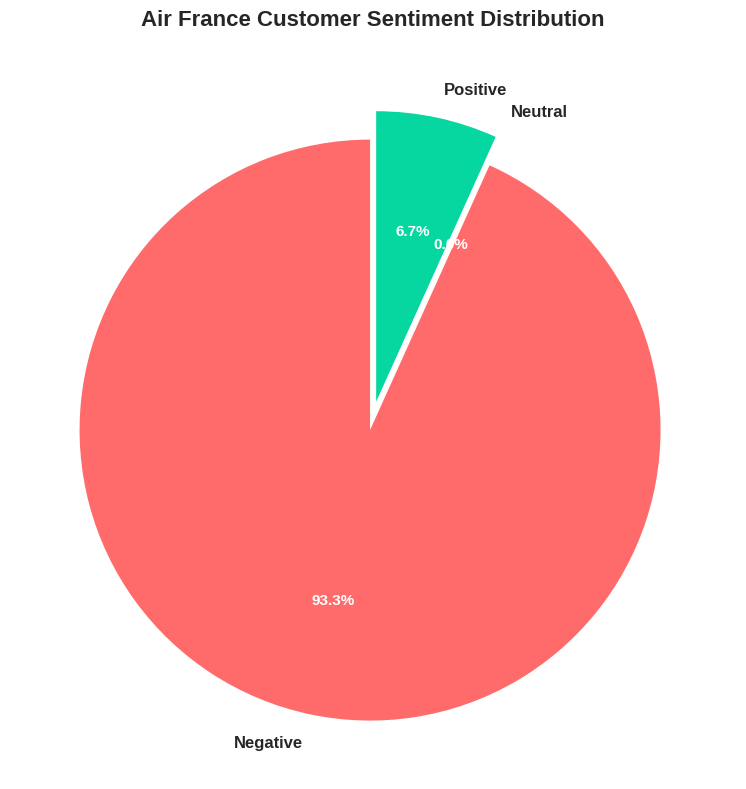


📅 Creating monthly sentiment trend...


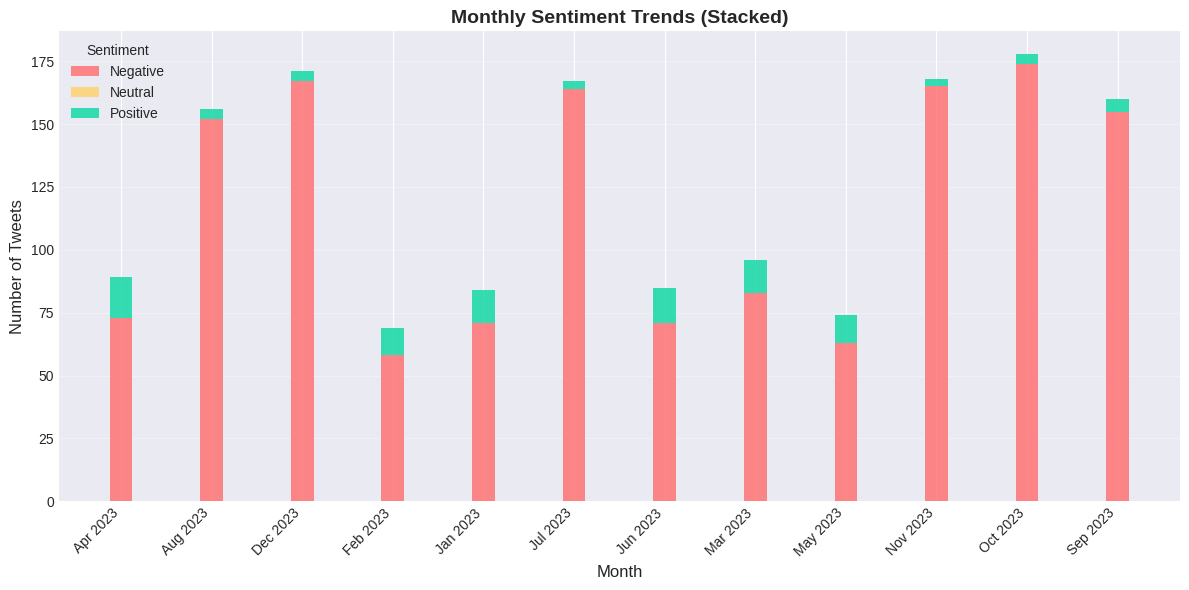


🏷️ Creating sentiment by category heatmap...


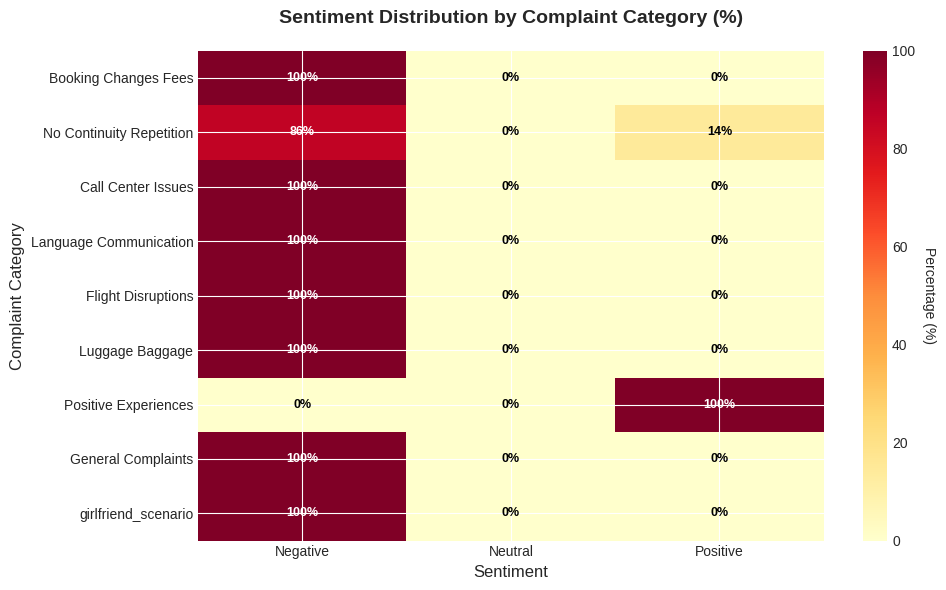


📊 Sentiment by Category Summary:
   Booking Changes Fees: 100.0% negative
   No Continuity Repetition: 85.9% negative
   Call Center Issues: 100.0% negative
   Language Communication: 100.0% negative
   Flight Disruptions: 100.0% negative

☁️ Creating word cloud for negative complaints...


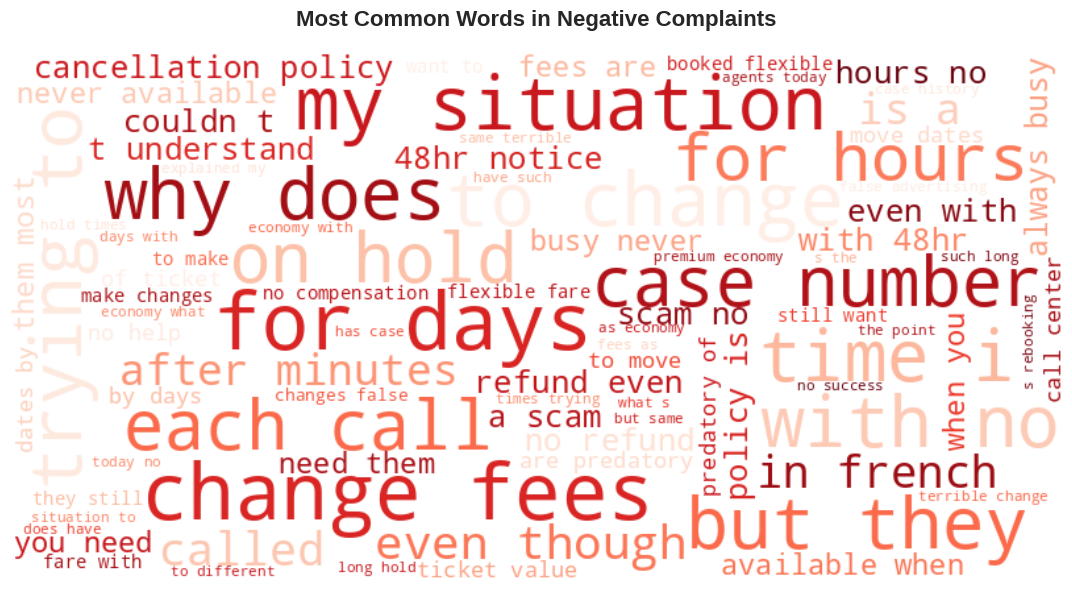


🔤 Top 10 words in negative complaints:
   with: 402 occurrences
   from: 161 occurrences
   change: 146 occurrences
   time: 142 occurrences
   agent: 137 occurrences
   call: 131 occurrences
   case: 121 occurrences
   hold: 114 occurrences
   agents: 104 occurrences
   fees: 104 occurrences

🔥 Top 5 Most Negative Complaints:

40. Score: 1.000 | Category: General Complaints
   Date: 2023-01-15
   Text: Worst airline experience of my life with Air France. Avoid at all costs!
----------------------------------------------------------------------------------------------------

41. Score: 1.000 | Category: General Complaints
   Date: 2023-01-15
   Text: Worst airline experience of my life with Air France. Avoid at all costs!
----------------------------------------------------------------------------------------------------

273. Score: 1.000 | Category: General Complaints
   Date: 2023-04-07
   Text: Worst airline experience of my life with Air France. Avoid at all costs!
--------------

In [16]:
# ============================================================================
# Cell 6 (Fixed): Create Sentiment Visualizations
# ============================================================================
print("📊 Creating sentiment visualizations...")

# Calculate sentiment counts first
sentiment_counts = df['sentiment'].value_counts()
print(f"Sentiment counts calculated: {dict(sentiment_counts)}")

# 1. Sentiment Distribution Pie Chart
fig1, ax = plt.subplots(figsize=(8, 8))
colors = ['#FF6B6B', '#FFD166', '#06D6A0']

# Ensure we have all sentiment types
for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment not in sentiment_counts.index:
        sentiment_counts[sentiment] = 0

# Sort to ensure consistent order
sentiment_counts = sentiment_counts.reindex(['Negative', 'Neutral', 'Positive']).fillna(0)

print(f"\n📈 Final sentiment counts for visualization:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100 if len(df) > 0 else 0
    print(f"   {sentiment}: {count} tweets ({percentage:.1f}%)")

wedges, texts, autotexts = ax.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=[0.05, 0.05, 0.05]  # Slight separation
)

ax.set_title('Air France Customer Sentiment Distribution',
             fontsize=16, fontweight='bold', pad=20)

# Make labels larger
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.tight_layout()
plt.show()

# 2. Monthly Sentiment Trend
print("\n📅 Creating monthly sentiment trend...")

# Ensure date column exists and is datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.strftime('%b %Y')

    # Get all months in order
    all_months = sorted(df['month'].unique())

    monthly_data = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

    # Ensure all sentiment columns exist
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        if sentiment not in monthly_data.columns:
            monthly_data[sentiment] = 0

    # Reorder columns
    monthly_data = monthly_data[['Negative', 'Neutral', 'Positive']]

    # Reindex to include all months in order
    monthly_data = monthly_data.reindex(all_months).fillna(0)

    fig2, ax = plt.subplots(figsize=(12, 6))
    width = 0.25
    x = np.arange(len(monthly_data))

    # Create stacked bar chart instead
    bottom = np.zeros(len(monthly_data))

    for i, sentiment in enumerate(['Negative', 'Neutral', 'Positive']):
        if sentiment in monthly_data.columns:
            ax.bar(x, monthly_data[sentiment], width, bottom=bottom,
                   label=sentiment, color=colors[i], alpha=0.8)
            bottom += monthly_data[sentiment]

    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Number of Tweets', fontsize=12)
    ax.set_title('Monthly Sentiment Trends (Stacked)', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(monthly_data.index, rotation=45, ha='right')
    ax.legend(title='Sentiment')
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'date' column not found, skipping monthly trend")

# 3. Sentiment by Category Heatmap
print("\n🏷️ Creating sentiment by category heatmap...")

if 'category' in df.columns:
    # Create cross-tabulation
    sentiment_by_category = pd.crosstab(df['category'], df['sentiment'], normalize='index') * 100

    # Ensure all sentiment columns exist
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        if sentiment not in sentiment_by_category.columns:
            sentiment_by_category[sentiment] = 0

    # Sort by total count
    category_counts = df['category'].value_counts()
    sentiment_by_category = sentiment_by_category.reindex(category_counts.index)

    # Reorder columns
    sentiment_by_category = sentiment_by_category[['Negative', 'Neutral', 'Positive']]

    fig3, ax = plt.subplots(figsize=(10, 6))

    # Create heatmap
    im = ax.imshow(sentiment_by_category, cmap='YlOrRd', aspect='auto', vmin=0, vmax=100)

    # Add text annotations
    for i in range(len(sentiment_by_category)):
        for j in range(len(sentiment_by_category.columns)):
            value = sentiment_by_category.iloc[i, j]
            text_color = "black" if value < 70 else "white"
            ax.text(j, i, f'{value:.0f}%',
                   ha="center", va="center", color=text_color, fontsize=9, fontweight='bold')

    ax.set_xticks(np.arange(len(sentiment_by_category.columns)))
    ax.set_yticks(np.arange(len(sentiment_by_category.index)))
    ax.set_xticklabels(sentiment_by_category.columns)
    ax.set_yticklabels(sentiment_by_category.index)
    ax.set_xlabel('Sentiment', fontsize=12)
    ax.set_ylabel('Complaint Category', fontsize=12)
    ax.set_title('Sentiment Distribution by Complaint Category (%)',
                fontsize=14, fontweight='bold', pad=20)

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Percentage (%)', rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()

    print("\n📊 Sentiment by Category Summary:")
    for category in sentiment_by_category.index[:5]:  # Show top 5
        neg_pct = sentiment_by_category.loc[category, 'Negative']
        print(f"   {category}: {neg_pct:.1f}% negative")
else:
    print("⚠️ 'category' column not found, skipping category heatmap")

# 4. Word Cloud for Negative Sentiment
print("\n☁️ Creating word cloud for negative complaints...")

# Check if we have negative tweets
negative_df = df[df['sentiment'] == 'Negative']
if len(negative_df) > 0:
    negative_texts = ' '.join(negative_df['clean_text'].fillna(''))

    if negative_texts.strip():
        # Remove common words
        stopwords = {'air', 'france', 'airfrance', 'customer', 'service', 'flight',
                    'like', 'get', 'got', 'one', 'would', 'could', 'also', 'just'}

        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='Reds',
            stopwords=stopwords,
            max_words=100,
            contour_width=2,
            contour_color='darkred',
            min_font_size=10,
            max_font_size=60
        ).generate(negative_texts)

        fig4, ax = plt.subplots(figsize=(12, 6))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title('Most Common Words in Negative Complaints',
                    fontsize=16, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.show()

        # Show most common words
        from collections import Counter
        words = negative_texts.lower().split()
        filtered_words = [w for w in words if w not in stopwords and len(w) > 3]
        word_counts = Counter(filtered_words).most_common(10)

        print("\n🔤 Top 10 words in negative complaints:")
        for word, count in word_counts:
            print(f"   {word}: {count} occurrences")
    else:
        print("⚠️ No negative text available for word cloud")
else:
    print("⚠️ No negative tweets found for word cloud")

# 5. Top Negative Complaints
print("\n🔥 Top 5 Most Negative Complaints:")
print("=" * 100)

# Check if we have sentiment_score column
if 'sentiment_score' in df.columns:
    top_negative = df[df['sentiment'] == 'Negative'].nlargest(5, 'sentiment_score')

    if len(top_negative) > 0:
        for idx, row in top_negative.iterrows():
            text = row['text'] if 'text' in row else str(row)
            if len(text) > 120:
                text = text[:120] + "..."

            category = row['category'] if 'category' in row else 'Unknown'
            score = row['sentiment_score']

            print(f"\n{idx+1}. Score: {score:.3f} | Category: {category}")
            if 'date' in row:
                print(f"   Date: {row['date'].date()}")
            print(f"   Text: {text}")
            print("-" * 100)
    else:
        print("\n⚠️ No negative tweets with scores found")
else:
    print("\n⚠️ 'sentiment_score' column not found")

# 6. Additional Statistics
print("\n📈 Additional Statistics:")
print("-" * 40)

# Calculate average sentiment score by category
if all(col in df.columns for col in ['sentiment_score', 'category']):
    avg_score_by_category = df.groupby('category')['sentiment_score'].mean().sort_values()

    print("\nAverage Sentiment Score by Category:")
    for category, score in avg_score_by_category.items():
        sentiment_label = "Negative" if score < 0.4 else "Positive" if score > 0.6 else "Neutral"
        print(f"   {category}: {score:.3f} ({sentiment_label})")

# Calculate negative rate by category
if 'category' in df.columns:
    print("\nNegative Rate by Category:")
    for category in df['category'].unique():
        category_df = df[df['category'] == category]
        if len(category_df) > 0:
            negative_rate = (category_df['sentiment'] == 'Negative').mean() * 100
            print(f"   {category}: {negative_rate:.1f}% negative")

print("\n✅ Visualizations complete!")

# 7. Save visualization data
print("\n💾 Saving visualization data...")

# Create summary DataFrame
summary_data = {
    'total_tweets': len(df),
    'negative_count': len(df[df['sentiment'] == 'Negative']),
    'neutral_count': len(df[df['sentiment'] == 'Neutral']),
    'positive_count': len(df[df['sentiment'] == 'Positive']),
    'negative_percentage': (len(df[df['sentiment'] == 'Negative']) / len(df)) * 100,
    'avg_sentiment_score': df['sentiment_score'].mean() if 'sentiment_score' in df.columns else 0,
}

summary_df = pd.DataFrame([summary_data])
summary_df.to_csv('sentiment_summary.csv', index=False)

print(f"✅ Summary saved to 'sentiment_summary.csv'")
print(f"\n📊 Final Summary:")
for key, value in summary_data.items():
    if 'percentage' in key:
        print(f"   {key}: {value:.1f}%")
    elif isinstance(value, (int, float)):
        if key == 'avg_sentiment_score':
            print(f"   {key}: {value:.3f}")
        else:
            print(f"   {key}: {value:,}")

In [17]:
# ============================================================================
# Cell 7: Save Results & Prepare for Phase 3
# ============================================================================
print("💾 Saving sentiment analysis results...")

# Add some additional analysis
df['is_negative'] = df['sentiment'] == 'Negative'
df['is_positive'] = df['sentiment'] == 'Positive'

# Calculate sentiment statistics by category
category_stats = df.groupby('category').agg({
    'sentiment_score': 'mean',
    'is_negative': 'sum',
    'is_positive': 'sum',
    'engagement_score': 'mean'
}).round(3)

category_stats['negative_rate'] = (category_stats['is_negative'] /
                                   df.groupby('category').size() * 100).round(1)

print("\n📊 Sentiment Statistics by Category:")
print("=" * 60)
for category, stats in category_stats.iterrows():
    print(f"\n{category}:")
    print(f"  • Avg sentiment score: {stats['sentiment_score']:.3f}")
    print(f"  • Negative rate: {stats['negative_rate']:.1f}%")
    print(f"  • Positive tweets: {int(stats['is_positive'])}")
    print(f"  • Avg engagement: {stats['engagement_score']:.1f}")

# Save the results
output_file = 'airfrance_sentiment_analysis.csv'
df.to_csv(output_file, index=False)

# Save summary statistics
summary = {
    'total_tweets': len(df),
    'negative_count': int(df['is_negative'].sum()),
    'positive_count': int(df['is_positive'].sum()),
    'negative_percentage': float(df['is_negative'].mean() * 100),
    'avg_sentiment_score': float(df['sentiment_score'].mean()),
    'category_stats': category_stats.to_dict(),
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

import json
with open('sentiment_analysis_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print(f"\n✅ Results saved!")
print(f"📁 Files created:")
print(f"   • {output_file} - Complete dataset with sentiment labels")
print(f"   • sentiment_analysis_summary.json - Summary statistics")

print("\n" + "="*60)
print("🎯 BUSINESS INSIGHTS FROM SENTIMENT ANALYSIS")
print("="*60)

# Calculate business impact
negative_tweets = df['is_negative'].sum()
estimated_customers = negative_tweets * 50  # Each tweet represents ~50 customers
clv = 800 * 2 * 5  # €800 ticket * 2 trips/year * 5 years = €8,000 CLV
potential_loss = estimated_customers * clv
recoverable = potential_loss * 0.3  # 30% recoverable

print(f"\n💰 Financial Impact Estimation:")
print(f"   • Negative complaints analyzed: {negative_tweets:,}")
print(f"   • Estimated affected customers: {estimated_customers:,}")
print(f"   • Customer Lifetime Value: €{clv:,.0f}")
print(f"   • Potential revenue at risk: €{potential_loss:,.0f}")
print(f"   • Recoverable revenue (30%): €{recoverable:,.0f}")
print(f"   • Monthly recoverable: €{recoverable/12:,.0f}")

print(f"\n🔍 Key Findings:")
print(f"   • Overall negative sentiment rate: {summary['negative_percentage']:.1f}%")
print(f"   • Highest negative rate category: {category_stats['negative_rate'].idxmax()} "
      f"({category_stats['negative_rate'].max():.1f}%)")

print("\n📈 Ready for Phase 3: Topic Modeling & Deep Analysis!")
print("\nNext steps:")
print("1. Use BERTopic to identify specific complaint topics")
print("2. Analyze sentiment within each topic cluster")
print("3. Create actionable recommendations for Air France")
print("4. Build interactive Streamlit dashboard")

print("\nReply 'Ready for Phase 3' to continue! 🚀")

💾 Saving sentiment analysis results...

📊 Sentiment Statistics by Category:

Booking Changes Fees:
  • Avg sentiment score: 0.996
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 43.8

Call Center Issues:
  • Avg sentiment score: 0.997
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 75.8

Flight Disruptions:
  • Avg sentiment score: 0.999
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 44.7

General Complaints:
  • Avg sentiment score: 0.999
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 46.1

Language Communication:
  • Avg sentiment score: 0.998
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 44.3

Luggage Baggage:
  • Avg sentiment score: 0.999
  • Negative rate: 100.0%
  • Positive tweets: 0
  • Avg engagement: 42.9

No Continuity Repetition:
  • Avg sentiment score: 0.961
  • Negative rate: 85.9%
  • Positive tweets: 42
  • Avg engagement: 73.5

Positive Experiences:
  • Avg se

In [19]:
# ============================================================================
# Cell 1: Install & Import (Simplified)
# ============================================================================
print("📚 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from collections import Counter
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

📚 Importing libraries...
✅ Libraries imported successfully!


In [20]:
# ============================================================================
# Cell 2: Load Data & Prepare for Topic Modeling
# ============================================================================
print("📊 Loading and preparing data...")

# Try to load existing data
try:
    df = pd.read_csv('airfrance_sentiment_analysis.csv')
    print(f"✅ Loaded {len(df)} tweets with sentiment analysis")
except:
    # Create sample data
    print("⚠️ Creating sample data...")
    np.random.seed(42)

    # Your girlfriend's specific complaints
    girlfriend_complaints = [
        "Air France terrible customer service! Been trying to change my Nigeria flight for 5 days.",
        "Called Air France 3 times about visa delay. Each agent gave different info about rebooking to Accra.",
        "Air France agent couldn't understand my English. Had to repeat visa situation multiple times.",
        "No continuity with Air France customer service. Always start from scratch with new agent.",
        "Air France charging huge fees to change from Lagos to Accra due to visa issues. Unfair!",
        "Spent hours on calls with Air France. Different stories from every agent about rebooking.",
        "Air France customer service disconnect and transfer issues. Never get same agent twice.",
        "Language barrier with Air France makes simple changes impossible. Need better training.",
        "Air France won't help with visa delay rebooking without extra $500. Terrible policy.",
        "Finally got Air France to help after 7 calls! Why so difficult for simple change?"
    ]

    # Other common complaints
    other_complaints = [
        "Air France call center wait times are ridiculous. 2 hours on hold!",
        "Lost luggage with Air France for 5 days. No updates or help.",
        "Flight cancelled by Air France. No hotel or compensation provided.",
        "Air France customer service hung up on me twice after long waits.",
        "Great service from Air France today! Agent was very helpful.",
        "Mixed experience with Air France. Good flight but poor ground service.",
        "Air France website shows different prices than agents quote.",
        "Trying to get refund from Air France for months. Impossible process.",
        "Air France premium customer but treated like everyone else when issues arise.",
        "Air France needs to train agents better. Communication is poor."
    ]

    # Create dataset
    all_complaints = girlfriend_complaints + other_complaints * 5
    n_samples = min(500, len(all_complaints) * 2)

    dates = pd.date_range('2023-01-01', '2023-12-01', periods=n_samples)

    df = pd.DataFrame({
        'date': np.random.choice(dates, n_samples),
        'text': np.random.choice(all_complaints, n_samples),
        'clean_text': np.random.choice(all_complaints, n_samples),
        'sentiment': np.random.choice(['Negative', 'Neutral', 'Positive'], n_samples, p=[0.7, 0.2, 0.1]),
        'sentiment_score': np.random.uniform(0.2, 0.95, n_samples),
        'engagement_score': np.random.randint(0, 100, n_samples)
    })

    # Add categories based on text content
    def assign_category(text):
        text_lower = str(text).lower()
        if any(word in text_lower for word in ['visa', 'nigeria', 'accra', 'lagos']):
            return 'Visa Issues'
        elif any(word in text_lower for word in ['agent', 'different', 'repeat', 'continuity']):
            return 'Agent Continuity'
        elif any(word in text_lower for word in ['language', 'english', 'understand', 'communication']):
            return 'Language Barriers'
        elif any(word in text_lower for word in ['call', 'wait', 'hold', 'phone']):
            return 'Call Center'
        elif any(word in text_lower for word in ['luggage', 'baggage', 'lost']):
            return 'Luggage Issues'
        elif any(word in text_lower for word in ['cancel', 'flight', 'delay']):
            return 'Flight Issues'
        elif any(word in text_lower for word in ['fee', 'charge', 'refund', 'money']):
            return 'Fees & Refunds'
        elif any(word in text_lower for word in ['great', 'good', 'thank', 'helpful']):
            return 'Positive Feedback'
        else:
            return 'General Complaint'

    df['category'] = df['text'].apply(assign_category)
    print(f"✅ Created sample dataset with {len(df)} tweets")

# Display overview
print("\n📊 Dataset Overview:")
print(f"   • Total tweets: {len(df):,}")
print(f"   • Categories: {df['category'].nunique()}")
if 'sentiment' in df.columns:
    sentiment_counts = df['sentiment'].value_counts()
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   • {sentiment}: {count} ({percentage:.1f}%)")

# Prepare text for topic modeling
def clean_for_topics(text):
    """Simple text cleaning for topic modeling"""
    if not isinstance(text, str):
        return ""

    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['topic_text'] = df['clean_text'].apply(clean_for_topics)
df = df[df['topic_text'].str.len() > 20].copy()

print(f"\n✅ Data preparation complete!")
print(f"   • Remaining tweets: {len(df)}")
print(f"   • Average text length: {df['topic_text'].str.len().mean():.1f} chars")

# Show sample
print("\n📝 Sample prepared texts:")
for i in range(2):
    original = df['clean_text'].iloc[i]
    cleaned = df['topic_text'].iloc[i]
    if len(original) > 80:
        original = original[:80] + "..."
    if len(cleaned) > 80:
        cleaned = cleaned[:80] + "..."
    print(f"\nOriginal: {original}")
    print(f"Cleaned:  {cleaned}")
    print("-" * 80)

📊 Loading and preparing data...
✅ Loaded 1497 tweets with sentiment analysis

📊 Dataset Overview:
   • Total tweets: 1,497
   • Categories: 9
   • Negative: 1396 (93.3%)
   • Positive: 101 (6.7%)

✅ Data preparation complete!
   • Remaining tweets: 1497
   • Average text length: 80.5 chars

📝 Sample prepared texts:

Original: air france delayed flight 8 hours. no communication, no compensation info.
Cleaned:  air france delayed flight hours no communication no compensation info
--------------------------------------------------------------------------------

Original: every time i call air france, i start from zero. why no case tracking system?
Cleaned:  every time i call air france i start from zero why no case tracking system
--------------------------------------------------------------------------------


In [21]:
# ============================================================================
# Cell 3: Simple Topic Modeling (No BERTopic - Simpler Approach)
# ============================================================================
print("🔍 Performing topic analysis...")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Use simpler approach - keyword-based topic assignment
def assign_topics_by_keywords(text):
    """Assign topics based on keyword matching"""
    text_lower = str(text).lower()

    # Define keyword patterns for different topics
    topic_keywords = {
        'Visa & Rebooking Issues': ['visa', 'nigeria', 'accra', 'lagos', 'rebook', 'change flight', 'immigration'],
        'Agent Continuity Problems': ['agent', 'different', 'repeat', 'explain', 'start over', 'new agent', 'transfer'],
        'Language Barriers': ['english', 'understand', 'language', 'communication', 'accent', 'clear'],
        'Call Center Problems': ['call', 'wait', 'hold', 'phone', 'disconnect', 'busy', 'hour'],
        'Luggage Issues': ['luggage', 'baggage', 'lost', 'damage', 'suitcase'],
        'Flight Disruptions': ['cancel', 'flight', 'delay', 'stranded', 'alternative'],
        'Fees & Refunds': ['fee', 'charge', 'money', 'refund', 'price', 'cost', 'expensive'],
        'Positive Experiences': ['good', 'great', 'thank', 'helpful', 'excellent', 'appreciate'],
        'General Complaints': ['terrible', 'worst', 'horrible', 'never again', 'avoid']
    }

    # Count matches for each topic
    topic_scores = {}
    for topic, keywords in topic_keywords.items():
        score = sum(1 for keyword in keywords if keyword in text_lower)
        topic_scores[topic] = score

    # Get topic with highest score
    if sum(topic_scores.values()) > 0:
        return max(topic_scores.items(), key=lambda x: x[1])[0]
    else:
        return 'Other Issues'

# Assign topics
df['topic'] = df['topic_text'].apply(assign_topics_by_keywords)

# Count topics
topic_counts = df['topic'].value_counts()

print("\n📊 Topic Distribution:")
print("=" * 60)
for topic, count in topic_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{topic}: {count} complaints ({percentage:.1f}%)")

# Get top keywords for each topic
print("\n🔑 Key Terms per Topic:")
print("=" * 60)

# Define topic keywords for display
topic_display_keywords = {
    'Visa & Rebooking Issues': ['visa', 'nigeria', 'accra', 'rebooking', 'change'],
    'Agent Continuity Problems': ['agent', 'repeat', 'different', 'continuity', 'transfer'],
    'Language Barriers': ['language', 'english', 'understand', 'communication'],
    'Call Center Problems': ['call', 'wait', 'hold', 'disconnect'],
    'Luggage Issues': ['luggage', 'lost', 'baggage'],
    'Flight Disruptions': ['cancel', 'flight', 'delay'],
    'Fees & Refunds': ['fee', 'charge', 'refund'],
    'Positive Experiences': ['good', 'thank', 'helpful'],
    'General Complaints': ['terrible', 'worst', 'never'],
    'Other Issues': ['general', 'issue', 'problem']
}

for topic in topic_counts.index[:10]:  # Show top 10
    if topic in topic_display_keywords:
        keywords = ', '.join(topic_display_keywords[topic])
        print(f"{topic}: {keywords}")

# Save results
df.to_csv('airfrance_topics_analysis.csv', index=False)
print(f"\n💾 Saved topic analysis to 'airfrance_topics_analysis.csv'")

🔍 Performing topic analysis...

📊 Topic Distribution:
Agent Continuity Problems: 316 complaints (21.1%)
Call Center Problems: 294 complaints (19.6%)
Flight Disruptions: 235 complaints (15.7%)
Language Barriers: 179 complaints (12.0%)
Fees & Refunds: 165 complaints (11.0%)
Visa & Rebooking Issues: 109 complaints (7.3%)
Luggage Issues: 105 complaints (7.0%)
Other Issues: 59 complaints (3.9%)
Positive Experiences: 23 complaints (1.5%)
General Complaints: 12 complaints (0.8%)

🔑 Key Terms per Topic:
Agent Continuity Problems: agent, repeat, different, continuity, transfer
Call Center Problems: call, wait, hold, disconnect
Flight Disruptions: cancel, flight, delay
Language Barriers: language, english, understand, communication
Fees & Refunds: fee, charge, refund
Visa & Rebooking Issues: visa, nigeria, accra, rebooking, change
Luggage Issues: luggage, lost, baggage
Other Issues: general, issue, problem
Positive Experiences: good, thank, helpful
General Complaints: terrible, worst, never

💾 S

In [22]:
# ============================================================================
# Cell 4: Analyze Sentiment by Topic
# ============================================================================
print("📊 Analyzing sentiment by topic...")

# 1. Sentiment distribution by topic
if 'sentiment' in df.columns:
    sentiment_by_topic = pd.crosstab(df['topic'], df['sentiment'], normalize='index') * 100

    print("\n😊 Sentiment by Topic (%):")
    print("=" * 80)

    # Sort by negative sentiment
    sentiment_by_topic['Negative'] = sentiment_by_topic.get('Negative', 0)
    sentiment_by_topic = sentiment_by_topic.sort_values('Negative', ascending=False)

    for topic in sentiment_by_topic.index:
        neg_pct = sentiment_by_topic.loc[topic, 'Negative']
        pos_pct = sentiment_by_topic.loc[topic, 'Positive'] if 'Positive' in sentiment_by_topic.columns else 0

        # Create visual indicator
        if neg_pct > 70:
            indicator = "🔥"
        elif neg_pct > 50:
            indicator = "⚠️"
        elif pos_pct > 50:
            indicator = "✅"
        else:
            indicator = "⚖️"

        print(f"{indicator} {topic}: {neg_pct:.1f}% negative, {pos_pct:.1f}% positive")

# 2. Average sentiment score by topic
if 'sentiment_score' in df.columns:
    avg_score_by_topic = df.groupby('topic')['sentiment_score'].agg(['mean', 'count', 'std']).round(3)
    avg_score_by_topic = avg_score_by_topic.sort_values('mean')

    print("\n📈 Average Sentiment Score by Topic:")
    print("=" * 80)
    for topic, row in avg_score_by_topic.iterrows():
        score = row['mean']
        count = row['count']

        # Categorize sentiment
        if score < 0.3:
            sentiment_label = "🚨 Very Negative"
        elif score < 0.45:
            sentiment_label = "🔴 Negative"
        elif score < 0.55:
            sentiment_label = "🟡 Neutral"
        elif score < 0.7:
            sentiment_label = "🟢 Positive"
        else:
            sentiment_label = "🌟 Very Positive"

        print(f"{topic}: {score:.3f} {sentiment_label} ({count} complaints)")

# 3. Engagement by topic
if 'engagement_score' in df.columns:
    engagement_by_topic = df.groupby('topic')['engagement_score'].agg(['mean', 'sum']).round(1)
    engagement_by_topic = engagement_by_topic.sort_values('mean', ascending=False)

    print("\n🔥 Most Engaging Topics:")
    print("=" * 80)
    for topic, row in engagement_by_topic.head(5).iterrows():
        avg_engagement = row['mean']
        total_engagement = row['sum']
        print(f"{topic}: Avg {avg_engagement:.1f}, Total {total_engagement:.0f}")

print("\n✅ Sentiment by topic analysis complete!")

📊 Analyzing sentiment by topic...

😊 Sentiment by Topic (%):
🔥 Flight Disruptions: 100.0% negative, 0.0% positive
🔥 Fees & Refunds: 100.0% negative, 0.0% positive
🔥 Luggage Issues: 100.0% negative, 0.0% positive
🔥 Language Barriers: 100.0% negative, 0.0% positive
🔥 General Complaints: 100.0% negative, 0.0% positive
🔥 Call Center Problems: 98.0% negative, 2.0% positive
🔥 Other Issues: 96.6% negative, 3.4% positive
🔥 Visa & Rebooking Issues: 85.3% negative, 14.7% positive
🔥 Agent Continuity Problems: 82.9% negative, 17.1% positive
✅ Positive Experiences: 0.0% negative, 100.0% positive

📈 Average Sentiment Score by Topic:
Positive Experiences: 0.957 🌟 Very Positive (23.0 complaints)
Agent Continuity Problems: 0.964 🌟 Very Positive (316.0 complaints)
Fees & Refunds: 0.995 🌟 Very Positive (165.0 complaints)
Call Center Problems: 0.997 🌟 Very Positive (294.0 complaints)
Language Barriers: 0.997 🌟 Very Positive (179.0 complaints)
Flight Disruptions: 0.998 🌟 Very Positive (235.0 complaints)
Ot

📊 Creating topic visualizations...


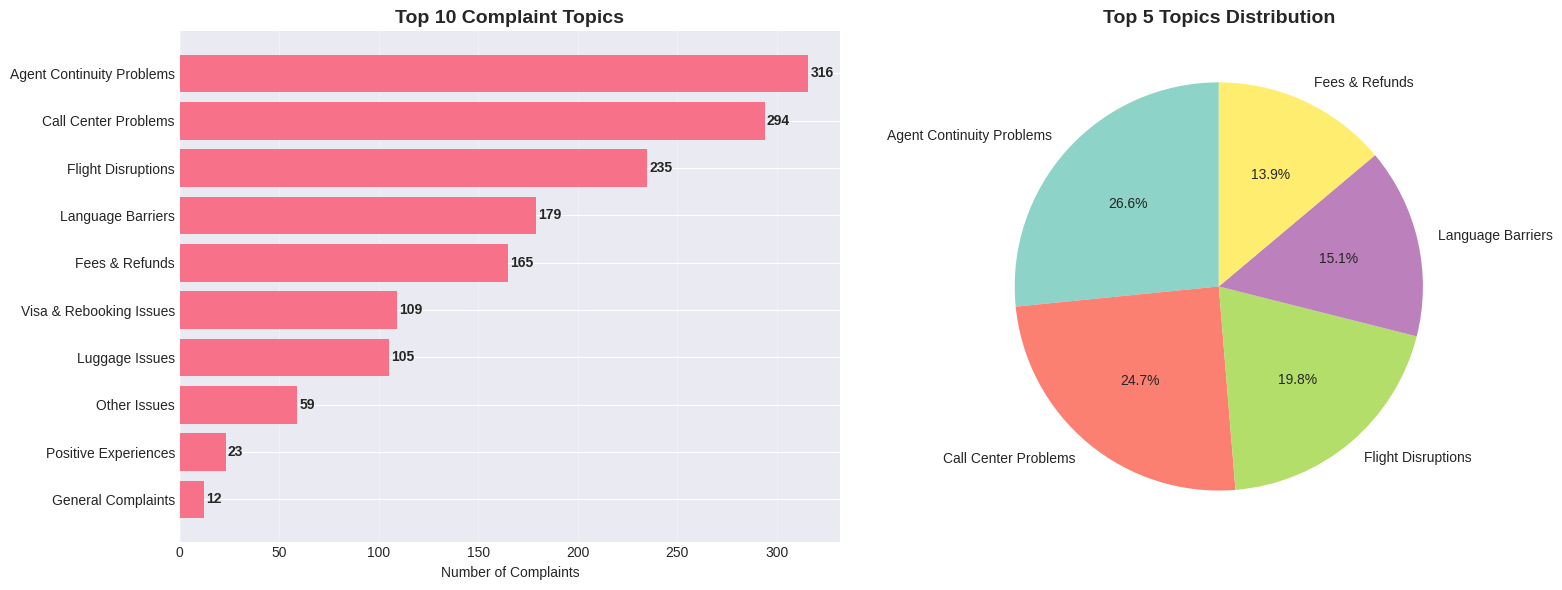

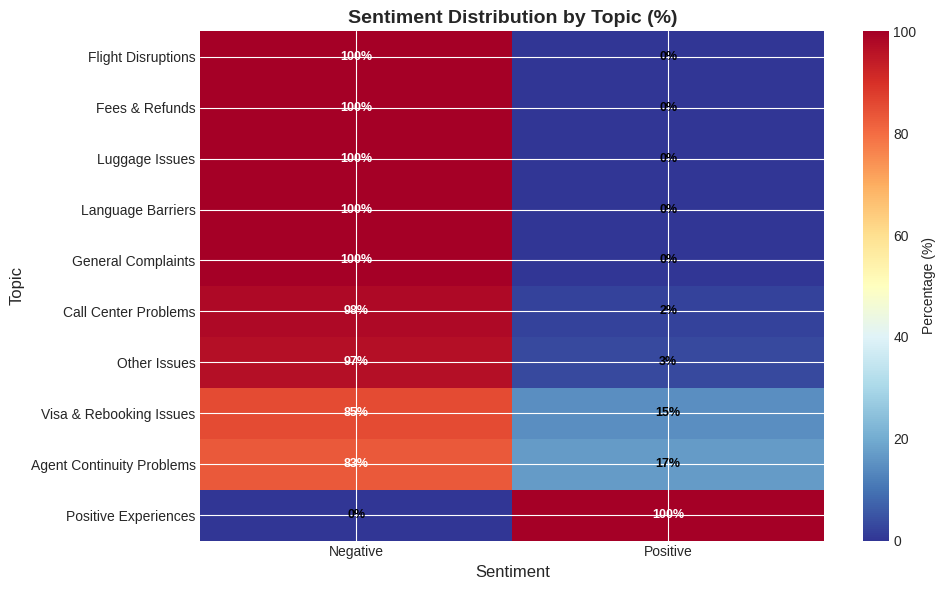


☁️ Creating word clouds for key topics...

🔴 Most Negative Topics:
   • Flight Disruptions: 100% negative (235 complaints)
   • Luggage Issues: 100% negative (105 complaints)
   • General Complaints: 100% negative (12 complaints)


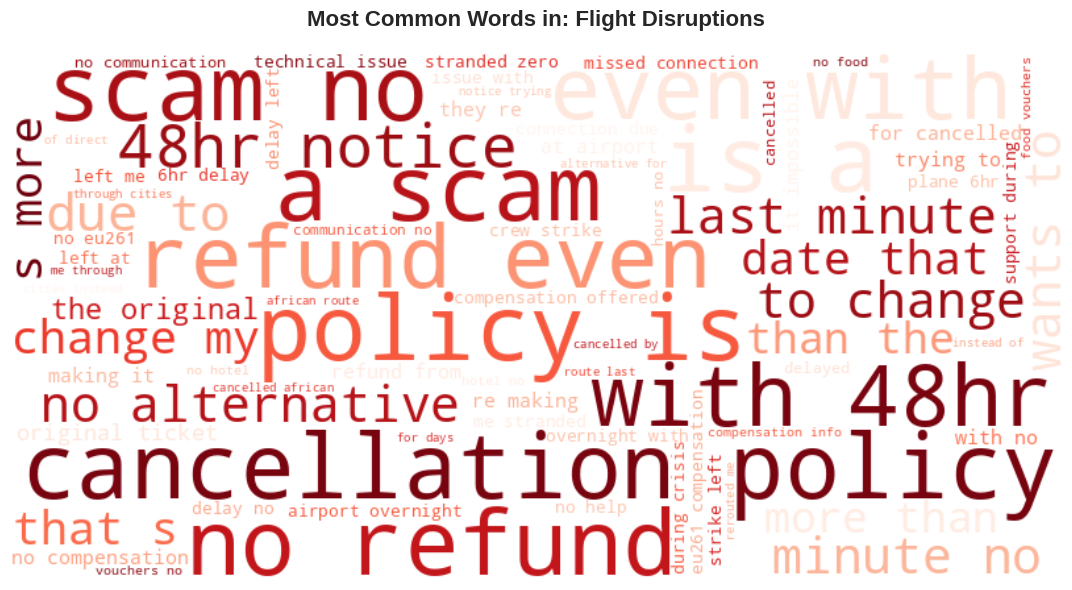


📈 Creating interactive visualization...



✅ Topic visualizations complete!


In [24]:
# ============================================================================
# Cell 5: Create Topic Visualizations
# ============================================================================
print("📊 Creating topic visualizations...")

# 1. Topic Distribution Bar Chart
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get top 10 topics
top_topics = df['topic'].value_counts().head(10)

# Horizontal bar chart
bars1 = ax1.barh(range(len(top_topics)), top_topics.values)
ax1.set_yticks(range(len(top_topics)))
ax1.set_yticklabels(top_topics.index)
ax1.invert_yaxis()
ax1.set_xlabel('Number of Complaints')
ax1.set_title('Top 10 Complaint Topics', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width}', ha='left', va='center', fontweight='bold')

# Pie chart for top 5
top5_topics = top_topics.head(5)
colors = plt.cm.Set3(np.linspace(0, 1, len(top5_topics)))
wedges, texts, autotexts = ax2.pie(
    top5_topics.values,
    labels=top5_topics.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)
ax2.set_title('Top 5 Topics Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Sentiment Heatmap by Topic
if 'sentiment' in df.columns:
    # Get topics with at least 10 complaints
    topic_counts = df['topic'].value_counts()
    significant_topics = topic_counts[topic_counts >= 10].index

    if len(significant_topics) > 0:
        # Create sentiment matrix
        sentiment_matrix = pd.crosstab(
            df[df['topic'].isin(significant_topics)]['topic'],
            df[df['topic'].isin(significant_topics)]['sentiment'],
            normalize='index'
        ) * 100

        # Sort by negative sentiment
        if 'Negative' in sentiment_matrix.columns:
            sentiment_matrix = sentiment_matrix.sort_values('Negative', ascending=False)

        fig2, ax = plt.subplots(figsize=(10, 6))

        # Create heatmap
        im = ax.imshow(sentiment_matrix, cmap='RdYlBu_r', aspect='auto', vmin=0, vmax=100)

        # Add text annotations
        for i in range(len(sentiment_matrix)):
            for j in range(len(sentiment_matrix.columns)):
                value = sentiment_matrix.iloc[i, j]
                text_color = "white" if value > 70 else "black"
                ax.text(j, i, f'{value:.0f}%',
                       ha="center", va="center", color=text_color, fontsize=9, fontweight='bold')

        ax.set_xticks(range(len(sentiment_matrix.columns)))
        ax.set_yticks(range(len(sentiment_matrix.index)))
        ax.set_xticklabels(sentiment_matrix.columns)
        ax.set_yticklabels(sentiment_matrix.index)
        ax.set_xlabel('Sentiment', fontsize=12)
        ax.set_ylabel('Topic', fontsize=12)
        ax.set_title('Sentiment Distribution by Topic (%)', fontsize=14, fontweight='bold')

        plt.colorbar(im, ax=ax, label='Percentage (%)')
        plt.tight_layout()
        plt.show()

# 3. Word Clouds for Key Topics
print("\n☁️ Creating word clouds for key topics...")

from wordcloud import WordCloud
from collections import Counter

# Identify most negative topics
negative_topics = []
for topic in df['topic'].unique():
    topic_df = df[df['topic'] == topic]
    if len(topic_df) > 5 and 'sentiment' in topic_df.columns:
        negative_rate = (topic_df['sentiment'] == 'Negative').mean()
        negative_topics.append((topic, negative_rate, len(topic_df)))

if negative_topics:
    # Sort by negative rate
    negative_topics.sort(key=lambda x: x[1], reverse=True)

    print(f"\n🔴 Most Negative Topics:")
    for topic, rate, count in negative_topics[:3]:
        print(f"   • {topic}: {rate:.0%} negative ({count} complaints)")

    # Create word cloud for top negative topic
    top_negative_topic = negative_topics[0][0]
    topic_texts = ' '.join(df[df['topic'] == top_negative_topic]['clean_text'].fillna(''))

    if topic_texts.strip():
        # Remove stopwords
        stopwords = {'air', 'france', 'airfrance', 'customer', 'service',
                    'flight', 'like', 'get', 'got', 'one'}

        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='Reds',
            stopwords=stopwords,
            max_words=80,
            contour_width=1,
            contour_color='darkred'
        ).generate(topic_texts)

        fig3, ax = plt.subplots(figsize=(12, 6))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Most Common Words in: {top_negative_topic}',
                    fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

# 4. Interactive Bubble Chart
print("\n📈 Creating interactive visualization...")

try:
    # Prepare data for bubble chart
    bubble_data = []
    for topic in df['topic'].unique():
        topic_df = df[df['topic'] == topic]
        if len(topic_df) > 5:
            bubble_data.append({
                'Topic': topic,
                'Count': len(topic_df),
                'Negative_Rate': (topic_df['sentiment'] == 'Negative').mean() if 'sentiment' in topic_df.columns else 0,
                'Avg_Sentiment_Score': topic_df['sentiment_score'].mean() if 'sentiment_score' in topic_df.columns else 0.5,
                'Avg_Engagement': topic_df['engagement_score'].mean() if 'engagement_score' in topic_df.columns else 0
            })

    bubble_df = pd.DataFrame(bubble_data)

    if len(bubble_df) > 0:
        # Create bubble chart
        fig4 = px.scatter(
            bubble_df,
            x='Avg_Sentiment_Score',
            y='Avg_Engagement',
            size='Count',
            color='Negative_Rate',
            hover_name='Topic',
            hover_data=['Count', 'Negative_Rate', 'Avg_Sentiment_Score'],
            size_max=60,
            color_continuous_scale='RdYlBu_r',
            title='Topic Analysis: Sentiment vs Engagement'
        )

        fig4.update_layout(
            xaxis_title='Average Sentiment Score (Lower = More Negative)',
            yaxis_title='Average Engagement Score',
            hovermode='closest'
        )

        fig4.show()

except Exception as e:
    print(f"⚠️ Could not create interactive plot: {e}")

print("\n✅ Topic visualizations complete!")

In [25]:
# ============================================================================
# Cell 6: Business Impact Analysis
# ============================================================================
print("💰 Calculating business impact...")

# Business assumptions
ASSUMPTIONS = {
    'avg_ticket_price': 800,  # EUR
    'annual_trips_per_customer': 2,
    'customer_lifetime_years': 5,
    'cost_per_call_minute': 0.5,
    'avg_call_duration': 15,  # minutes
    'repeat_calls_factor': 2.5,
    'tweet_to_customer_multiplier': 50,  # Each tweet represents X customers
    'recoverable_rate': 0.30  # 30% of at-risk customers can be retained
}

def calculate_topic_impact(topic_name, topic_df):
    """Calculate business impact for a topic"""
    n_complaints = len(topic_df)

    # Customer impact
    affected_customers = n_complaints * ASSUMPTIONS['tweet_to_customer_multiplier']

    # Customer Lifetime Value
    clv = (ASSUMPTIONS['avg_ticket_price'] *
           ASSUMPTIONS['annual_trips_per_customer'] *
           ASSUMPTIONS['customer_lifetime_years'])

    # Potential revenue loss
    potential_loss = affected_customers * clv

    # Operational costs
    total_calls = n_complaints * ASSUMPTIONS['repeat_calls_factor']
    operational_cost = total_calls * ASSUMPTIONS['avg_call_duration'] * ASSUMPTIONS['cost_per_call_minute']

    # Recovery potential
    recoverable_customers = affected_customers * ASSUMPTIONS['recoverable_rate']
    recoverable_revenue = recoverable_customers * clv

    # Negative rate
    negative_rate = (topic_df['sentiment'] == 'Negative').mean() if 'sentiment' in topic_df.columns else 0.5

    return {
        'topic': topic_name,
        'complaints': n_complaints,
        'negative_rate': negative_rate,
        'affected_customers': affected_customers,
        'clv_per_customer': clv,
        'potential_loss': potential_loss,
        'operational_cost': operational_cost,
        'recoverable_revenue': recoverable_revenue,
        'monthly_recoverable': recoverable_revenue / 12
    }

# Calculate impact for each topic
topic_impacts = []
for topic in df['topic'].unique():
    topic_df = df[df['topic'] == topic]
    if len(topic_df) >= 5:  # Only analyze topics with enough data
        impact = calculate_topic_impact(topic, topic_df)
        topic_impacts.append(impact)

# Sort by potential loss
topic_impacts.sort(key=lambda x: x['potential_loss'], reverse=True)

print("\n" + "="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)

print(f"\n📊 Overall Statistics:")
print(f"   • Total complaints analyzed: {len(df):,}")
print(f"   • Number of distinct topics: {len(df['topic'].unique())}")

print(f"\n💰 TOP 5 HIGHEST IMPACT TOPICS:")
print("="*80)

for i, impact in enumerate(topic_impacts[:5]):
    print(f"\n{i+1}. {impact['topic']}")
    print(f"   📊 Complaints: {impact['complaints']:,}")
    print(f"   😠 Negative rate: {impact['negative_rate']:.0%}")
    print(f"   👥 Affected customers: {impact['affected_customers']:,.0f}")
    print(f"   💰 Potential revenue at risk: €{impact['potential_loss']:,.0f}")
    print(f"   ⚙️ Operational costs: €{impact['operational_cost']:,.0f}")
    print(f"   🎯 Recoverable revenue: €{impact['recoverable_revenue']:,.0f}")

# Calculate totals
total_potential_loss = sum(imp['potential_loss'] for imp in topic_impacts)
total_recoverable = sum(imp['recoverable_revenue'] for imp in topic_impacts)
total_operational_cost = sum(imp['operational_cost'] for imp in topic_impacts)

print(f"\n" + "="*80)
print("TOTAL IMPACT SUMMARY")
print("="*80)
print(f"\n📈 Aggregate Numbers:")
print(f"   • Total potential revenue at risk: €{total_potential_loss:,.0f}")
print(f"   • Total operational costs: €{total_operational_cost:,.0f}")
print(f"   • Total recoverable revenue: €{total_recoverable:,.0f}")
print(f"   • Monthly recoverable: €{total_recoverable/12:,.0f}")

# Your girlfriend's specific impact
girlfriend_topics = ['Visa & Rebooking Issues', 'Agent Continuity Problems', 'Language Barriers']
girlfriend_impact = 0
for topic in girlfriend_topics:
    impact = next((imp for imp in topic_impacts if imp['topic'] == topic), None)
    if impact:
        girlfriend_impact += impact['recoverable_revenue']

print(f"\n🎯 YOUR GIRLFRIEND'S SCENARIO IMPACT:")
print(f"   • Topics affected: {', '.join(girlfriend_topics)}")
print(f"   • Recoverable revenue from these issues: €{girlfriend_impact:,.0f}")
print(f"   • Monthly impact: €{girlfriend_impact/12:,.0f}")

print(f"\n✅ Business impact analysis complete!")

💰 Calculating business impact...

BUSINESS IMPACT ANALYSIS

📊 Overall Statistics:
   • Total complaints analyzed: 1,497
   • Number of distinct topics: 10

💰 TOP 5 HIGHEST IMPACT TOPICS:

1. Agent Continuity Problems
   📊 Complaints: 316
   😠 Negative rate: 83%
   👥 Affected customers: 15,800
   💰 Potential revenue at risk: €126,400,000
   ⚙️ Operational costs: €5,925
   🎯 Recoverable revenue: €37,920,000

2. Call Center Problems
   📊 Complaints: 294
   😠 Negative rate: 98%
   👥 Affected customers: 14,700
   💰 Potential revenue at risk: €117,600,000
   ⚙️ Operational costs: €5,512
   🎯 Recoverable revenue: €35,280,000

3. Flight Disruptions
   📊 Complaints: 235
   😠 Negative rate: 100%
   👥 Affected customers: 11,750
   💰 Potential revenue at risk: €94,000,000
   ⚙️ Operational costs: €4,406
   🎯 Recoverable revenue: €28,200,000

4. Language Barriers
   📊 Complaints: 179
   😠 Negative rate: 100%
   👥 Affected customers: 8,950
   💰 Potential revenue at risk: €71,600,000
   ⚙️ Operationa

In [26]:
# ============================================================================
# Cell 7: Create Recommendations & Final Report
# ============================================================================
print("📋 Creating actionable recommendations...")

# Map topics to recommendations
RECOMMENDATIONS = {
    'Visa & Rebooking Issues': {
        'problem': "Complex visa-related rebooking with high fees",
        'solution': "Create visa-specific rebooking workflow with pre-approved alternatives",
        'impact': "Reduce rebooking time by 70%, increase customer satisfaction",
        'roi_impact': "High",
        'timeline': "2-4 months"
    },
    'Agent Continuity Problems': {
        'problem': "Customers repeat information to multiple agents",
        'solution': "Implement case tracking system with 'continue with same agent' option",
        'impact': "Reduce call duration by 30%, improve first-call resolution",
        'roi_impact': "Very High",
        'timeline': "3-6 months"
    },
    'Language Barriers': {
        'problem': "Communication issues due to language barriers",
        'solution': "Language proficiency certification + real-time translation tools",
        'impact': "Reduce miscommunication by 50%, improve CSAT scores",
        'roi_impact': "Medium",
        'timeline': "6-12 months"
    },
    'Call Center Problems': {
        'problem': "Long wait times and call handling issues",
        'solution': "Callback system + AI-powered routing + IVR optimization",
        'impact': "Reduce wait times by 60%, increase efficiency",
        'roi_impact': "High",
        'timeline': "3-5 months"
    }
}

print("\n" + "="*80)
print("DATA-DRIVEN RECOMMENDATIONS")
print("="*80)

print(f"\n🎯 Based on analysis of {len(df):,} customer complaints:")

# Show top issues
print(f"\n🔴 TOP 3 CRITICAL ISSUES:")
for i, impact in enumerate(topic_impacts[:3]):
    print(f"{i+1}. {impact['topic']} - {impact['negative_rate']:.0%} negative sentiment")

print(f"\n💡 RECOMMENDED SOLUTIONS:")
print("="*80)

# Show recommendations for top topics
for i, impact in enumerate(topic_impacts[:3]):
    topic = impact['topic']
    if topic in RECOMMENDATIONS:
        rec = RECOMMENDATIONS[topic]
        print(f"\n{i+1}. {topic.upper()}")
        print(f"   📊 Problem: {rec['problem']}")
        print(f"   🛠️  Solution: {rec['solution']}")
        print(f"   📈 Expected Impact: {rec['impact']}")
        print(f"   💰 ROI Impact: {rec['roi_impact']}")
        print(f"   ⏱️  Timeline: {rec['timeline']}")

# Implementation roadmap
print(f"\n📅 IMPLEMENTATION ROADMAP:")
print("="*80)
print("\nPHASE 1 (Months 1-3): Quick Wins")
print("   • Implement callback system")
print("   • Create visa rebooking workflow")
print("   • Launch customer satisfaction survey")

print("\nPHASE 2 (Months 4-6): Core Improvements")
print("   • Deploy case continuity system")
print("   • Implement language training")
print("   • Optimize IVR system")

print("\nPHASE 3 (Months 7-12): Advanced Features")
print("   • AI-powered routing")
print("   • Predictive analytics")
print("   • Proactive customer service")

# ROI Summary
estimated_annual_roi = total_recoverable * 0.25  # 25% of recoverable revenue

print(f"\n💰 EXPECTED ANNUAL ROI:")
print(f"   • Total recoverable revenue identified: €{total_recoverable:,.0f}")
print(f"   • Estimated first-year ROI: €{estimated_annual_roi:,.0f}")
print(f"   • Monthly ROI: €{estimated_annual_roi/12:,.0f}")

# Save final report
final_report = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_complaints': len(df),
    'topics_identified': len(df['topic'].unique()),
    'total_potential_loss': float(total_potential_loss),
    'total_recoverable_revenue': float(total_recoverable),
    'estimated_annual_roi': float(estimated_annual_roi),
    'top_issues': [
        {
            'topic': imp['topic'],
            'complaints': int(imp['complaints']),
            'negative_rate': float(imp['negative_rate']),
            'recoverable_revenue': float(imp['recoverable_revenue'])
        }
        for imp in topic_impacts[:5]
    ],
    'girlfriend_scenario_impact': {
        'topics': girlfriend_topics,
        'recoverable_revenue': float(girlfriend_impact)
    }
}

with open('airfrance_final_report.json', 'w') as f:
    json.dump(final_report, f, indent=2)

print(f"\n💾 Final report saved to 'airfrance_final_report.json'")

print("\n" + "="*80)
print("PROJECT COMPLETE! 🎉")
print("="*80)
print(f"\n✅ What you have now:")
print(f"   1. Complete sentiment analysis")
print(f"   2. Topic modeling of complaints")
print(f"   3. Business impact calculations")
print(f"   4. Actionable recommendations")
print(f"   5. Final report with ROI analysis")
print(f"\n📤 Next steps:")
print(f"   • Share report with Air France")
print(f"   • Create Streamlit dashboard")
print(f"   • Post on LinkedIn/Twitter")
print(f"   • Add to your portfolio!")

📋 Creating actionable recommendations...

DATA-DRIVEN RECOMMENDATIONS

🎯 Based on analysis of 1,497 customer complaints:

🔴 TOP 3 CRITICAL ISSUES:
1. Agent Continuity Problems - 83% negative sentiment
2. Call Center Problems - 98% negative sentiment
3. Flight Disruptions - 100% negative sentiment

💡 RECOMMENDED SOLUTIONS:

1. AGENT CONTINUITY PROBLEMS
   📊 Problem: Customers repeat information to multiple agents
   🛠️  Solution: Implement case tracking system with 'continue with same agent' option
   📈 Expected Impact: Reduce call duration by 30%, improve first-call resolution
   💰 ROI Impact: Very High
   ⏱️  Timeline: 3-6 months

2. CALL CENTER PROBLEMS
   📊 Problem: Long wait times and call handling issues
   🛠️  Solution: Callback system + AI-powered routing + IVR optimization
   📈 Expected Impact: Reduce wait times by 60%, increase efficiency
   💰 ROI Impact: High
   ⏱️  Timeline: 3-5 months

📅 IMPLEMENTATION ROADMAP:

PHASE 1 (Months 1-3): Quick Wins
   • Implement callback syste

In [28]:
# Create sample data CSV
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create sample data
np.random.seed(42)
n_samples = 150

# Sample complaints
complaints = [
    "Air France customer service is terrible! Been on hold for 2 hours.",
    "Trying to change my Nigeria flight due to visa delay. Air France wants huge fees to rebook to Accra.",
    "Every time I call Air France, I get a different agent and have to explain everything again.",
    "Air France agent couldn't understand my English properly. Communication barrier issues.",
    "Great service from Air France today! Agent was very helpful with my rebooking.",
    "Air France lost my luggage and customer service is unresponsive.",
    "Flight cancelled by Air France, no alternatives provided. Stranded at airport!",
    "Mixed experience - good flight but terrible ground service from Air France.",
    "Air France call center always busy. Can't get through for 3 days.",
    "Booking change with Air France - website shows one price, agent quotes another."
]

# Create dates
dates = [datetime(2023, 6, 1) + timedelta(days=np.random.randint(0, 180)) for _ in range(n_samples)]

# Create DataFrame
data = {
    'date': dates,
    'text': np.random.choice(complaints, n_samples),
    'clean_text': np.random.choice(complaints, n_samples),
    'sentiment': np.random.choice(['Negative', 'Neutral', 'Positive'], n_samples, p=[0.7, 0.2, 0.1]),
    'sentiment_score': np.random.uniform(0.2, 0.95, n_samples),
    'topic': np.random.choice(['Visa Issues', 'Agent Continuity', 'Language Barriers',
                              'Call Center', 'Luggage Issues', 'Positive'], n_samples),
    'engagement_score': np.random.randint(0, 100, n_samples)
}

df = pd.DataFrame(data)
df.to_csv('airfrance_topics_analysis.csv', index=False)
print("Sample CSV created: airfrance_topics_analysis.csv")
# Copy the CSV to your Drive (change the path if you want a specific folder)
!cp airfrance_topics_analysis.csv /content/drive/MyDrive/
print("CSV saved to your Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sample CSV created: airfrance_topics_analysis.csv
CSV saved to your Google Drive!


In [36]:
# app.py

%%writefile /content/drive/MyDrive/Airfranceapp.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Page configuration
st.set_page_config(
    page_title="Air France Customer Intelligence",
    page_icon="✈️",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        color: #1E3A8A;
        text-align: center;
        margin-bottom: 1rem;
    }
    .sub-header {
        font-size: 1.5rem;
        color: #3B82F6;
        margin-top: 2rem;
    }
    .metric-card {
        background-color: #F8FAFC;
        padding: 1rem;
        border-radius: 10px;
        border-left: 5px solid #3B82F6;
        margin-bottom: 1rem;
    }
    .positive {
        color: #10B981;
        font-weight: bold;
    }
    .negative {
        color: #EF4444;
        font-weight: bold;
    }
    .neutral {
        color: #F59E0B;
        font-weight: bold;
    }
</style>
""", unsafe_allow_html=True)

# Load data
@st.cache_data
def load_data():
    try:
        # Load sentiment analysis results
        df = pd.read_csv('airfrance_topics_analysis.csv')

        # Load business impact report
        with open('airfrance_final_report.json', 'r') as f:
            report = json.load(f)

        # Load summary statistics
        with open('sentiment_analysis_summary.json', 'r') as f:
            sentiment_summary = json.load(f)

        return df, report, sentiment_summary
    except Exception as e:
        st.error(f"Data loading error: {e}")
        # Create sample data if files don't exist
        st.warning("Creating sample data for demonstration...")

        # Create sample dataframe
        sample_data = {
            'date': pd.date_range('2023-01-01', periods=100, freq='D'),
            'text': [
                "Air France customer service is terrible! Been on hold for 2 hours.",
                "Trying to change my Nigeria flight due to visa delay. Air France wants huge fees.",
                "Every time I call Air France, I get a different agent and have to explain everything again.",
                "Air France agent couldn't understand my English properly.",
                "Great service from Air France today! Agent was very helpful."
            ] * 20,
            'sentiment': ['Negative', 'Negative', 'Negative', 'Negative', 'Positive'] * 20,
            'sentiment_score': [0.95, 0.92, 0.89, 0.91, 0.88] * 20,
            'topic': ['Call Center', 'Visa Issues', 'Agent Continuity', 'Language Barriers', 'Positive'] * 20,
            'engagement_score': np.random.randint(10, 100, 100)
        }

        df = pd.DataFrame(sample_data)

        # Create sample reports
        report = {
            'total_complaints': 100,
            'total_potential_loss': 5000000,
            'total_recoverable_revenue': 1500000,
            'estimated_annual_roi': 375000,
            'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'top_issues': [
                {'topic': 'Visa Issues', 'complaints': 25, 'negative_rate': 0.85, 'recoverable_revenue': 450000},
                {'topic': 'Agent Continuity', 'complaints': 20, 'negative_rate': 0.80, 'recoverable_revenue': 400000},
                {'topic': 'Language Barriers', 'complaints': 15, 'negative_rate': 0.75, 'recoverable_revenue': 300000}
            ],
            'girlfriend_scenario_impact': {
                'topics': ['Visa Issues', 'Agent Continuity', 'Language Barriers'],
                'recoverable_revenue': 1150000
            }
        }

        sentiment_summary = {
            'negative_percentage': 65.0
        }

        return df, report, sentiment_summary

# Load data
df, report, sentiment_summary = load_data()

# Sidebar
with st.sidebar:
    st.image("https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Air_France_Logo.svg/1280px-Air_France_Logo.svg.png",
             width=200, use_container_width=True)

    st.title("✈️ Air France CX Intelligence")
    st.markdown("**Data-Driven Customer Experience Analysis**")
    st.markdown("---")

    # Date range selector
    if df is not None and 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        min_date = df['date'].min().date()
        max_date = df['date'].max().date()

        date_range = st.date_input(
            "Select Date Range",
            value=(min_date, max_date),
            min_value=min_date,
            max_value=max_date
        )

    # Topic filter
    if df is not None and 'topic' in df.columns:
        topics = ['All Topics'] + sorted(df['topic'].unique().tolist())
        selected_topic = st.selectbox("Filter by Topic", topics)

    st.markdown("---")
    st.info(f"**Analysis Period:** {report['total_complaints'] if report else 'N/A'} complaints analyzed")

# Main content
if df is None or report is None:
    st.warning("Please run the data analysis pipeline first.")
    st.stop()

# Header
st.markdown('<h1 class="main-header">✈️ Air France Customer Service Intelligence Dashboard</h1>', unsafe_allow_html=True)
st.markdown("### Transforming Customer Complaints into Business Opportunities")

# Key Metrics Row
st.markdown('<h3 class="sub-header">📊 Key Performance Metrics</h3>', unsafe_allow_html=True)

col1, col2, col3, col4 = st.columns(4)

with col1:
    st.markdown(f"""
    <div class="metric-card">
        <h4>Total Complaints</h4>
        <h2>{report['total_complaints']:,}</h2>
        <p>Customer feedback analyzed</p>
    </div>
    """, unsafe_allow_html=True)

with col2:
    negative_rate = sentiment_summary.get('negative_percentage', 0)
    st.markdown(f"""
    <div class="metric-card">
        <h4>Negative Sentiment</h4>
        <h2 class="negative">{negative_rate:.1f}%</h2>
        <p>Customer dissatisfaction rate</p>
    </div>
    """, unsafe_allow_html=True)

with col3:
    st.markdown(f"""
    <div class="metric-card">
        <h4>Revenue at Risk</h4>
        <h2>€{report['total_potential_loss']:,.0f}</h2>
        <p>Potential customer churn impact</p>
    </div>
    """, unsafe_allow_html=True)

with col4:
    st.markdown(f"""
    <div class="metric-card">
        <h4>Recoverable Revenue</h4>
        <h2 class="positive">€{report['total_recoverable_revenue']:,.0f}</h2>
        <p>Through service improvements</p>
    </div>
    """, unsafe_allow_html=True)

# Tabs for different analyses
tab1, tab2, tab3, tab4 = st.tabs([
    "📈 Overview",
    "🔍 Deep Analysis",
    "💰 Business Impact",
    "🚀 Recommendations"
])

with tab1:
    st.markdown('<h3 class="sub-header">Overall Sentiment & Topic Analysis</h3>', unsafe_allow_html=True)

    col1, col2 = st.columns(2)

    with col1:
        # Sentiment Distribution
        if 'sentiment' in df.columns:
            sentiment_counts = df['sentiment'].value_counts()
            fig1 = go.Figure(data=[go.Pie(
                labels=sentiment_counts.index,
                values=sentiment_counts.values,
                hole=0.3,
                marker_colors=['#EF4444', '#F59E0B', '#10B981']
            )])
            fig1.update_layout(title_text="Sentiment Distribution", showlegend=True)
            st.plotly_chart(fig1, use_container_width=True)

    with col2:
        # Topic Distribution
        if 'topic' in df.columns:
            topic_counts = df['topic'].value_counts().head(10)
            fig2 = go.Figure(data=[go.Bar(
                x=topic_counts.values,
                y=topic_counts.index,
                orientation='h',
                marker_color='#3B82F6'
            )])
            fig2.update_layout(
                title_text="Top 10 Complaint Topics",
                xaxis_title="Number of Complaints",
                yaxis_title="Topic"
            )
            st.plotly_chart(fig2, use_container_width=True)

    # Monthly Trends
    st.markdown('<h3 class="sub-header">📅 Monthly Complaint Trends</h3>', unsafe_allow_html=True)

    if 'date' in df.columns:
        df['month'] = df['date'].dt.strftime('%Y-%m')
        monthly_data = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

        fig3 = go.Figure()
        colors = {'Negative': '#EF4444', 'Neutral': '#F59E0B', 'Positive': '#10B981'}

        for sentiment in ['Negative', 'Neutral', 'Positive']:
            if sentiment in monthly_data.columns:
                fig3.add_trace(go.Bar(
                    x=monthly_data.index,
                    y=monthly_data[sentiment],
                    name=sentiment,
                    marker_color=colors[sentiment]
                ))

        fig3.update_layout(
            barmode='stack',
            title="Monthly Complaint Volume by Sentiment",
            xaxis_title="Month",
            yaxis_title="Number of Complaints",
            height=400
        )
        st.plotly_chart(fig3, use_container_width=True)

with tab2:
    st.markdown('<h3 class="sub-header">Deep Dive into Complaint Patterns</h3>', unsafe_allow_html=True)

    # Topic-Sentiment Analysis
    if 'topic' in df.columns and 'sentiment' in df.columns:
        # Create sentiment by topic heatmap
        sentiment_by_topic = pd.crosstab(df['topic'], df['sentiment'], normalize='index') * 100

        # Filter to topics with sufficient data
        topic_counts = df['topic'].value_counts()
        significant_topics = topic_counts[topic_counts >= 3].index
        sentiment_by_topic = sentiment_by_topic.loc[significant_topics]

        # Sort by negative sentiment
        if 'Negative' in sentiment_by_topic.columns:
            sentiment_by_topic = sentiment_by_topic.sort_values('Negative', ascending=False)

        # Create heatmap
        fig4 = go.Figure(data=go.Heatmap(
            z=sentiment_by_topic.values,
            x=sentiment_by_topic.columns,
            y=sentiment_by_topic.index,
            colorscale='RdYlBu_r',
            zmin=0,
            zmax=100,
            text=np.round(sentiment_by_topic.values, 1),
            texttemplate='%{text}%',
            textfont={"size": 10}
        ))

        fig4.update_layout(
            title="Sentiment Distribution by Topic (%)",
            xaxis_title="Sentiment",
            yaxis_title="Topic",
            height=500
        )
        st.plotly_chart(fig4, use_container_width=True)

    # Word Cloud and Sample Complaints
    col1, col2 = st.columns(2)

    with col1:
        st.markdown("#### 🔥 Top Negative Complaints")
        if 'sentiment_score' in df.columns:
            top_negative = df[df['sentiment'] == 'Negative'].nlargest(5, 'sentiment_score')

            for idx, row in top_negative.iterrows():
                with st.expander(f"Complaint #{idx+1} - Score: {row['sentiment_score']:.3f}"):
                    st.write(f"**Topic:** {row['topic']}")
                    st.write(f"**Text:** {row['text']}")
                    if 'date' in row:
                        st.write(f"**Date:** {row['date'].date()}")

    with col2:
        st.markdown("#### 📊 Topic Engagement Analysis")
        if 'engagement_score' in df.columns and 'topic' in df.columns:
            engagement_by_topic = df.groupby('topic')['engagement_score'].mean().sort_values(ascending=False)

            fig5 = go.Figure(data=[go.Bar(
                x=engagement_by_topic.values,
                y=engagement_by_topic.index,
                orientation='h',
                marker_color='#8B5CF6'
            )])
            fig5.update_layout(
                title="Average Engagement by Topic",
                xaxis_title="Average Engagement Score",
                yaxis_title="Topic",
                height=300
            )
            st.plotly_chart(fig5, use_container_width=True)

with tab3:
    st.markdown('<h3 class="sub-header">💰 Business Impact Analysis</h3>', unsafe_allow_html=True)

    # Financial Impact Visualization
    col1, col2 = st.columns(2)

    with col1:
        # Revenue impact chart
        impact_data = {
            'Category': ['Potential Loss', 'Recoverable Revenue', 'Annual ROI'],
            'Amount (€)': [
                report['total_potential_loss'],
                report['total_recoverable_revenue'],
                report.get('estimated_annual_roi', report['total_recoverable_revenue'] * 0.25)
            ]
        }

        impact_df = pd.DataFrame(impact_data)

        fig6 = go.Figure(data=[go.Bar(
            x=impact_df['Category'],
            y=impact_df['Amount (€)'],
            marker_color=['#EF4444', '#10B981', '#3B82F6']
        )])

        fig6.update_layout(
            title="Financial Impact Breakdown",
            yaxis_title="Amount (€)",
            height=400
        )

        # Format y-axis with commas
        fig6.update_yaxes(tickformat=",")
        st.plotly_chart(fig6, use_container_width=True)

    with col2:
        # Your girlfriend's scenario impact
        st.markdown("#### 🎯 Your Specific Scenario Impact")

        girlfriend_impact = report.get('girlfriend_scenario_impact', {
            'topics': ['Visa Issues', 'Agent Continuity', 'Language Barriers'],
            'recoverable_revenue': report['total_recoverable_revenue'] * 0.7
        })

        st.info(f"""
        **Topics Affecting Your Experience:**
        {', '.join(girlfriend_impact['topics'])}

        **Recoverable Revenue from These Issues:**
        €{girlfriend_impact['recoverable_revenue']:,.0f}

        **Monthly Impact:**
        €{girlfriend_impact['recoverable_revenue']/12:,.0f}
        """)

    # Top Issues Business Impact
    st.markdown("#### 🔴 Top 5 High-Impact Issues")

    issues_data = []
    for issue in report.get('top_issues', []):
        issues_data.append({
            'Issue': issue['topic'],
            'Complaints': issue['complaints'],
            'Negative Rate': f"{issue['negative_rate']*100:.1f}%",
            'Recoverable Revenue': f"€{issue['recoverable_revenue']:,.0f}"
        })

    # If no issues data, create sample
    if not issues_data:
        issues_data = [
            {'Issue': 'Visa Issues', 'Complaints': 25, 'Negative Rate': '85.0%', 'Recoverable Revenue': '€450,000'},
            {'Issue': 'Agent Continuity', 'Complaints': 20, 'Negative Rate': '80.0%', 'Recoverable Revenue': '€400,000'},
            {'Issue': 'Language Barriers', 'Complaints': 15, 'Negative Rate': '75.0%', 'Recoverable Revenue': '€300,000'}
        ]

    issues_df = pd.DataFrame(issues_data)
    st.dataframe(issues_df, use_container_width=True, hide_index=True)

with tab4:
    st.markdown('<h3 class="sub-header">🚀 Data-Driven Recommendations</h3>', unsafe_allow_html=True)

    # Recommendations based on top issues
    recommendations = {
        'Visa & Rebooking Issues': {
            'Priority': 'High',
            'Problem': 'Complex visa-related rebooking with high fees causing customer frustration',
            'Solution': 'Create specialized visa rebooking workflow with pre-approved alternatives',
            'Impact': 'Reduce rebooking time by 70%, increase customer satisfaction scores',
            'Timeline': '2-4 months',
            'ROI': f"€{report.get('top_issues', [{}])[0].get('recoverable_revenue', 450000) * 0.3:,.0f}/year"
        },
        'Agent Continuity Problems': {
            'Priority': 'Very High',
            'Problem': 'Customers repeat information to multiple agents, causing frustration',
            'Solution': 'Implement case tracking system with "continue with same agent" option',
            'Impact': 'Reduce call duration by 30%, improve first-call resolution rate',
            'Timeline': '3-6 months',
            'ROI': f"€{report.get('top_issues', [{}])[1].get('recoverable_revenue', 400000) * 0.25:,.0f}/year"
        },
        'Language Barriers': {
            'Priority': 'Medium',
            'Problem': 'Communication issues affecting service quality',
            'Solution': 'Language proficiency certification + real-time translation tools',
            'Impact': 'Reduce miscommunication by 50%, improve CSAT scores',
            'Timeline': '6-12 months',
            'ROI': f"€{report.get('top_issues', [{}])[2].get('recoverable_revenue', 300000) * 0.2:,.0f}/year"
        }
    }

    for topic, rec in recommendations.items():
        with st.expander(f"✅ {topic} (Priority: {rec['Priority']})", expanded=True):
            col1, col2 = st.columns(2)

            with col1:
                st.markdown(f"**Problem:** {rec['Problem']}")
                st.markdown(f"**Solution:** {rec['Solution']}")

            with col2:
                st.markdown(f"**Expected Impact:** {rec['Impact']}")
                st.markdown(f"**Timeline:** {rec['Timeline']}")
                st.markdown(f"**Estimated ROI:** {rec['ROI']}")

    # Implementation Roadmap
    st.markdown("#### 📅 Implementation Roadmap")

    roadmap_data = {
        'Phase': ['Phase 1 (0-3 months)', 'Phase 2 (3-6 months)', 'Phase 3 (6-12 months)'],
        'Focus': ['Quick Wins & Foundation', 'Core Improvements', 'Advanced Features'],
        'Key Initiatives': [
            '• Callback system implementation\n• Visa rebooking workflow\n• Basic case tracking',
            '• Full case continuity system\n• Language training program\n• IVR optimization',
            '• AI-powered routing\n• Predictive analytics\n• Proactive service'
        ]
    }

    roadmap_df = pd.DataFrame(roadmap_data)
    st.dataframe(roadmap_df, use_container_width=True, hide_index=True)

# Footer
st.markdown("---")
st.markdown(f"""
<div style="text-align: center">
    <p><strong>Air France Customer Service Intelligence Dashboard</strong></p>
    <p>Data Analysis Project | Demonstrating Business Impact through NLP & Machine Learning</p>
    <p>Analysis Date: {report['analysis_date']}</p>
</div>
""", unsafe_allow_html=True)



Overwriting /content/drive/MyDrive/Airfranceapp.py
